In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Loading Datset ⏳</b></div>

In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

---

### 1. Checking Dimension of the Datasets.

In [4]:
print("Train Dataset has ",df_train.shape[0],"Records/Rows and ",df_train.shape[1],"attributes/columns.")
print("Test Dataset has ",df_test.shape[0],"Records/Rows and ",df_test.shape[1],"attributes/columns.")

Train Dataset has  1460 Records/Rows and  81 attributes/columns.
Test Dataset has  1459 Records/Rows and  80 attributes/columns.


---

### 2. Generating Basic Information of Train Data.

In [5]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


---

### 3. Performing Descriptive Statistical Analysis on Categorical Features.

In [6]:
df_train.describe(include="object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **None of the categorical features** are having **high cardinality.**
* **Features** like **`Neighborhood`**, **`Exterior1st`**, **`Exterior2nd`** are having **little bit of high cardinality** but that can be **manged** using different techniques of **encoding.**

---

### 4. Performing Descriptive Statistical Analysis on Numerical Features.

In [7]:
df_train.describe(include=[int,float])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Numerical Features** like **`LotArea`**, **`BsmtFinSF1`**,**`BsmtUnfSF`**, **`TotalBsmtSF`**,**`GrLivArea`**, **`MiscVal`** and even the target feature **SalePrice** is having **very high deviation** values which can **lead to bias, Overfitting, and can affect the accuracy of the model.**
* So we have to use **different transformation technique** to reduce the deviation between the data-points. 

---

### 1. Showing Random Sample of the Dataset.

In [8]:
df_train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1311  1312          20       RL         68.0     8814   Pave   NaN      Reg   
489    490         180       RM         21.0     1526   Pave   NaN      Reg   
827    828          20       RL         65.0     8529   Pave   NaN      IR1   
1353  1354          50       RL         56.0    14720   Pave   NaN      IR1   
628    629          60       RL         70.0    11606   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1311         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
489          Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
827          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
1353         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
628          HLS    AllPub    Inside       Sev        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1311       Norm     1Fam     1Story            7            5       2005   
489        Norm    Twnhs     SFoyer            4            8       1970   
827        Norm     1Fam     1Story            7            5       2001   
1353       Norm     1Fam     1.5Fin            8            5       1995   
628        Norm     1Fam     2Story            5            5       1969   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1311          2007     Gable  CompShg     VinylSd     VinylSd    BrkFace   
489           2002     Gable  CompShg     CemntBd     CmentBd       None   
827           2001     Gable  CompShg     VinylSd     VinylSd       None   
1353          1996       Hip  CompShg     VinylSd     VinylSd    BrkFace   
628           1969     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1311        80.0        Gd        TA      PConc       Gd       TA   
489          0.0        TA        Gd     CBlock       Gd       TA   
827          0.0        Gd        TA      PConc       Gd       TA   
1353       579.0        Gd        TA      PConc       Gd       TA   
628        192.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1311           No          GLQ         925          Unf           0   
489            Av          GLQ         515          Unf           0   
827            No          GLQ          20          Unf           0   
1353           Av          GLQ         816          Unf           0   
628            Av          Rec         650          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1311        349         1274    GasA        Ex          Y      SBrkr   
489         115          630    GasA        TA          Y      SBrkr   
827        1434         1454    GasA        Ex          Y      SBrkr   
1353       1217         2033    GasA        Ex          Y      SBrkr   
628         390         1040    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1311      1274         0             0       1274             1             0   
489        630         0             0        630             1             0   
827       1434         0             0       1434             0             0   
1353      2053      1185             0       3238             1             0   
628       1040      1040             0       2080             0             1   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1311         2         0             3             1          Gd   
489          1         0             1             1          Gd   
827          2         0             3             1          Gd   
1353         2         1             4             1          Gd   
628          1         2             5             1          Fa   

   

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can observe that feature named **Id** represnt a **index number** to each records in the dataset.
* This feature **doesn't seem relevant** for the **analysis**, so we can simply **drop this feature.**

### 2. Dropping "Id" Feature.

In [9]:
test_id = df_test["Id"]    ##Storing test id because we need it for subission file.
df_train.drop(columns="Id",inplace=True)
df_test.drop(columns="Id",inplace=True)

---

### 3. Computing Features with Missing Values More Than 45%.

In [10]:
null_df = round(df_train.isnull().sum()/len(df_train)*100,2).sort_values().to_frame().rename(columns=
                                                                                    {0:"Train % of Missing Values"})
null_df["Test % of Missing Values"] = round(df_test.isnull().sum()/len(df_train)*100,2)

In [11]:
null_df[(null_df["Train % of Missing Values"]>45) | (null_df["Test % of Missing Values"]>45)]

Train % of Missing Values  Test % of Missing Values
FireplaceQu                      47.26                     50.00
Fence                            80.75                     80.07
Alley                            93.77                     92.60
MiscFeature                      96.30                     96.44
PoolQC                           99.52                     99.73

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features like **`PoolQC`**,**`MiscFeature`**, **`Alley`** & **`Fence`** are **having large number of missing values.**
* **Data Imputation** in features with **large scale of misisng values** can lead to **bias & noise** in the dataset.
* So we can simply **drop** those features with **large scale of missing values.**

---

### 4. Dropping Features with more than 45% of Missing Values.

In [12]:
cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]

df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)

---

### 5. Combining Train & Test Dataset for Easier Analysis.

In [13]:
target = df_train[["SalePrice"]].reset_index(drop=True)

df_train.drop(columns=["SalePrice"],inplace=True)

df = pd.concat([df_train,df_test]).reset_index(drop=True)

In [14]:
df.shape

(2919, 74)

---

### 6. Computing Total Missing Values and % of Misisng Values.

In [15]:
null_df = df.isnull().sum()[df.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100,2)
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes

In [16]:
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtUnfSF                        1                 0.03           float64
GarageArea                       1                 0.03           float64
GarageCars                       1                 0.03           float64
KitchenQual                      1                 0.03            object
Electrical                       1                 0.03            object
TotalBsmtSF                      1                 0.03           float64
BsmtFinSF2                       1                 0.03           float64
BsmtFinSF1                       1                 0.03           float64
SaleType                         1                 0.03            object
Exterior1st                      1                 0.03            object
Exterior2nd                      1                 0.03            object
BsmtHalfBath                     2                 0.07           float64
Utilities                        2                 0.07            object
Functional                       2                 0.07            object
BsmtFullBath                     2                 0.07           float64
MSZoning                         4                 0.14            object
MasVnrArea                      23                 0.79           float64
MasVnrType                      24                 0.82            object
BsmtFinType1                    79                 2.71            object
BsmtFinType2                    80                 2.74            object
BsmtQual                        81                 2.77            object
BsmtCond                        82                 2.81            object
BsmtExposure                    82                 2.81            object
GarageType                     157                 5.38            object
GarageCond                     159                 5.45            object
GarageYrBlt                    159                 5.45           float64
GarageFinish                   159                 5.45            object
GarageQual                     159                 5.45            object
LotFrontage                    486                16.65           float64

---

### 7. Filling Missing Values in Features realted to Garage & Basement.

In [17]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

---

### 8. Filling Missing Values in Categorical Columns.

In [18]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [19]:
cat_cols = ['Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical',
            'KitchenQual','Functional','SaleType']

imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

---

### 9. Filling Missing Values in Numerical Columns.

In [20]:
df["LotFrontage"] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df["MasVnrArea"]  = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF1"]  = df.groupby("BsmtFinType1")["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF2"]  = df.groupby("BsmtFinType2")["BsmtFinSF2"].transform(lambda x: x.fillna(x.median()))

In [21]:
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0.0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0.0)
df["TotalBsmtSF"]  = df["BsmtFinSF1"] + df["BsmtFinSF2"]
df["BsmtUnfSF"]    = df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].median())

---

### 10. Confirming Filling of Missing Values.

In [22]:
print("Total Missing Values Left is:",df.isnull().sum().sum())

Total Missing Values Left is: 0


---

### 11. Separating Train and Test Datframe.

In [23]:
train_df = pd.concat([df.iloc[:len(target["SalePrice"]),:],target],axis=1)
test_df = df.iloc[len(target["SalePrice"]):,:]

In [24]:
print("Dimension of train data is:",train_df.shape)
print("Dimension of test data is:",test_df.shape)

Dimension of train data is: (1460, 75)
Dimension of test data is: (1459, 74)


---

### 1. Analyzing & Visualizing Target Varibele (SalePrice).

In [25]:
train_df["SalePrice"].describe().to_frame().T

count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0

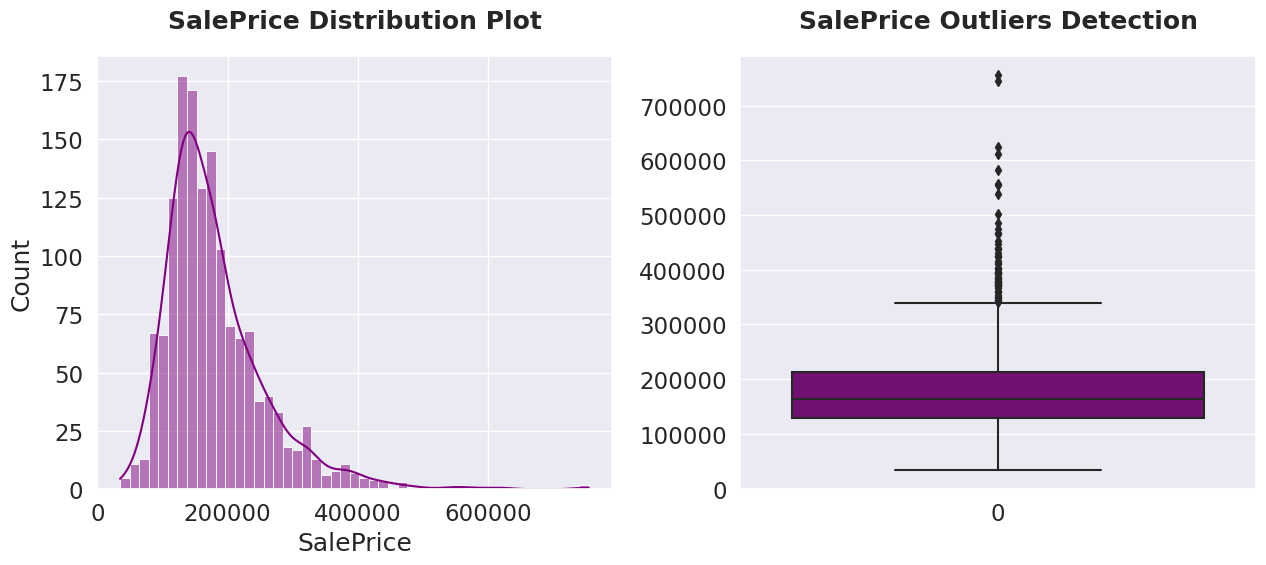

In [26]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.histplot(train_df["SalePrice"],color="purple",kde=True)
plt.title("SalePrice Distribution Plot",fontweight="black",pad=20,size=18)

plt.subplot(1,2,2)
sns.boxplot(train_df["SalePrice"],color="purple")
plt.title("SalePrice Outliers Detection",fontweight="black",pad=20,size=18)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The target feature is having a **right-skewed distribution** due to presence of **positive outliers.**
* It is apparent that **SalePrice doesn't follow normal distribution**, so before performing regression it has to be transformed.
* To achieve a **Normal Distribution** we can use different **transformation techniques** like:
    * **`Johnsonsu Transformation`**, **`Norm Transformation`** or **`Log Noraml Transformation`**
    * From these three tansformation which ever **gives best fit** we can **use that transformation.**

----

### 2. Visualizing Different Transformation Techniques on "SalePrice" Attribute.

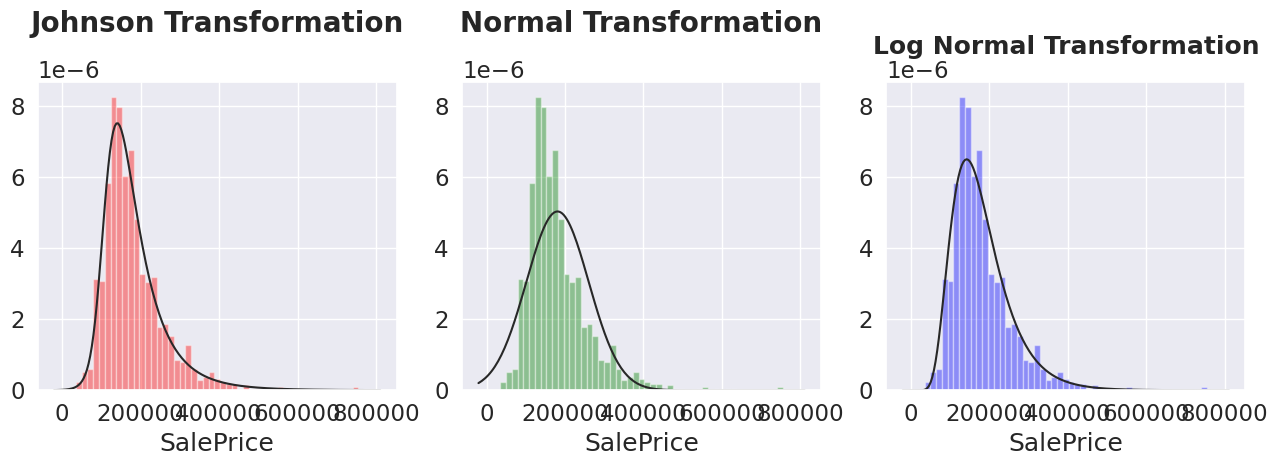

In [27]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Johnson Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,2)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.norm,color="green")
plt.title("Normal Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,3)
sns.distplot(train_df["SalePrice"],kde=False,fit=stats.lognorm,color="blue")
plt.title("Log Normal Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **After applying** different transformation techniques the best result were given by **`Unbounded Johnson Transformation`.**
    
* But the **`Log Normal Transformation`** has also done a good job to achieve a **`normal distribution.`**

---

### 3. Visualizing Distribution of Continous Numerical Features.

In [28]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

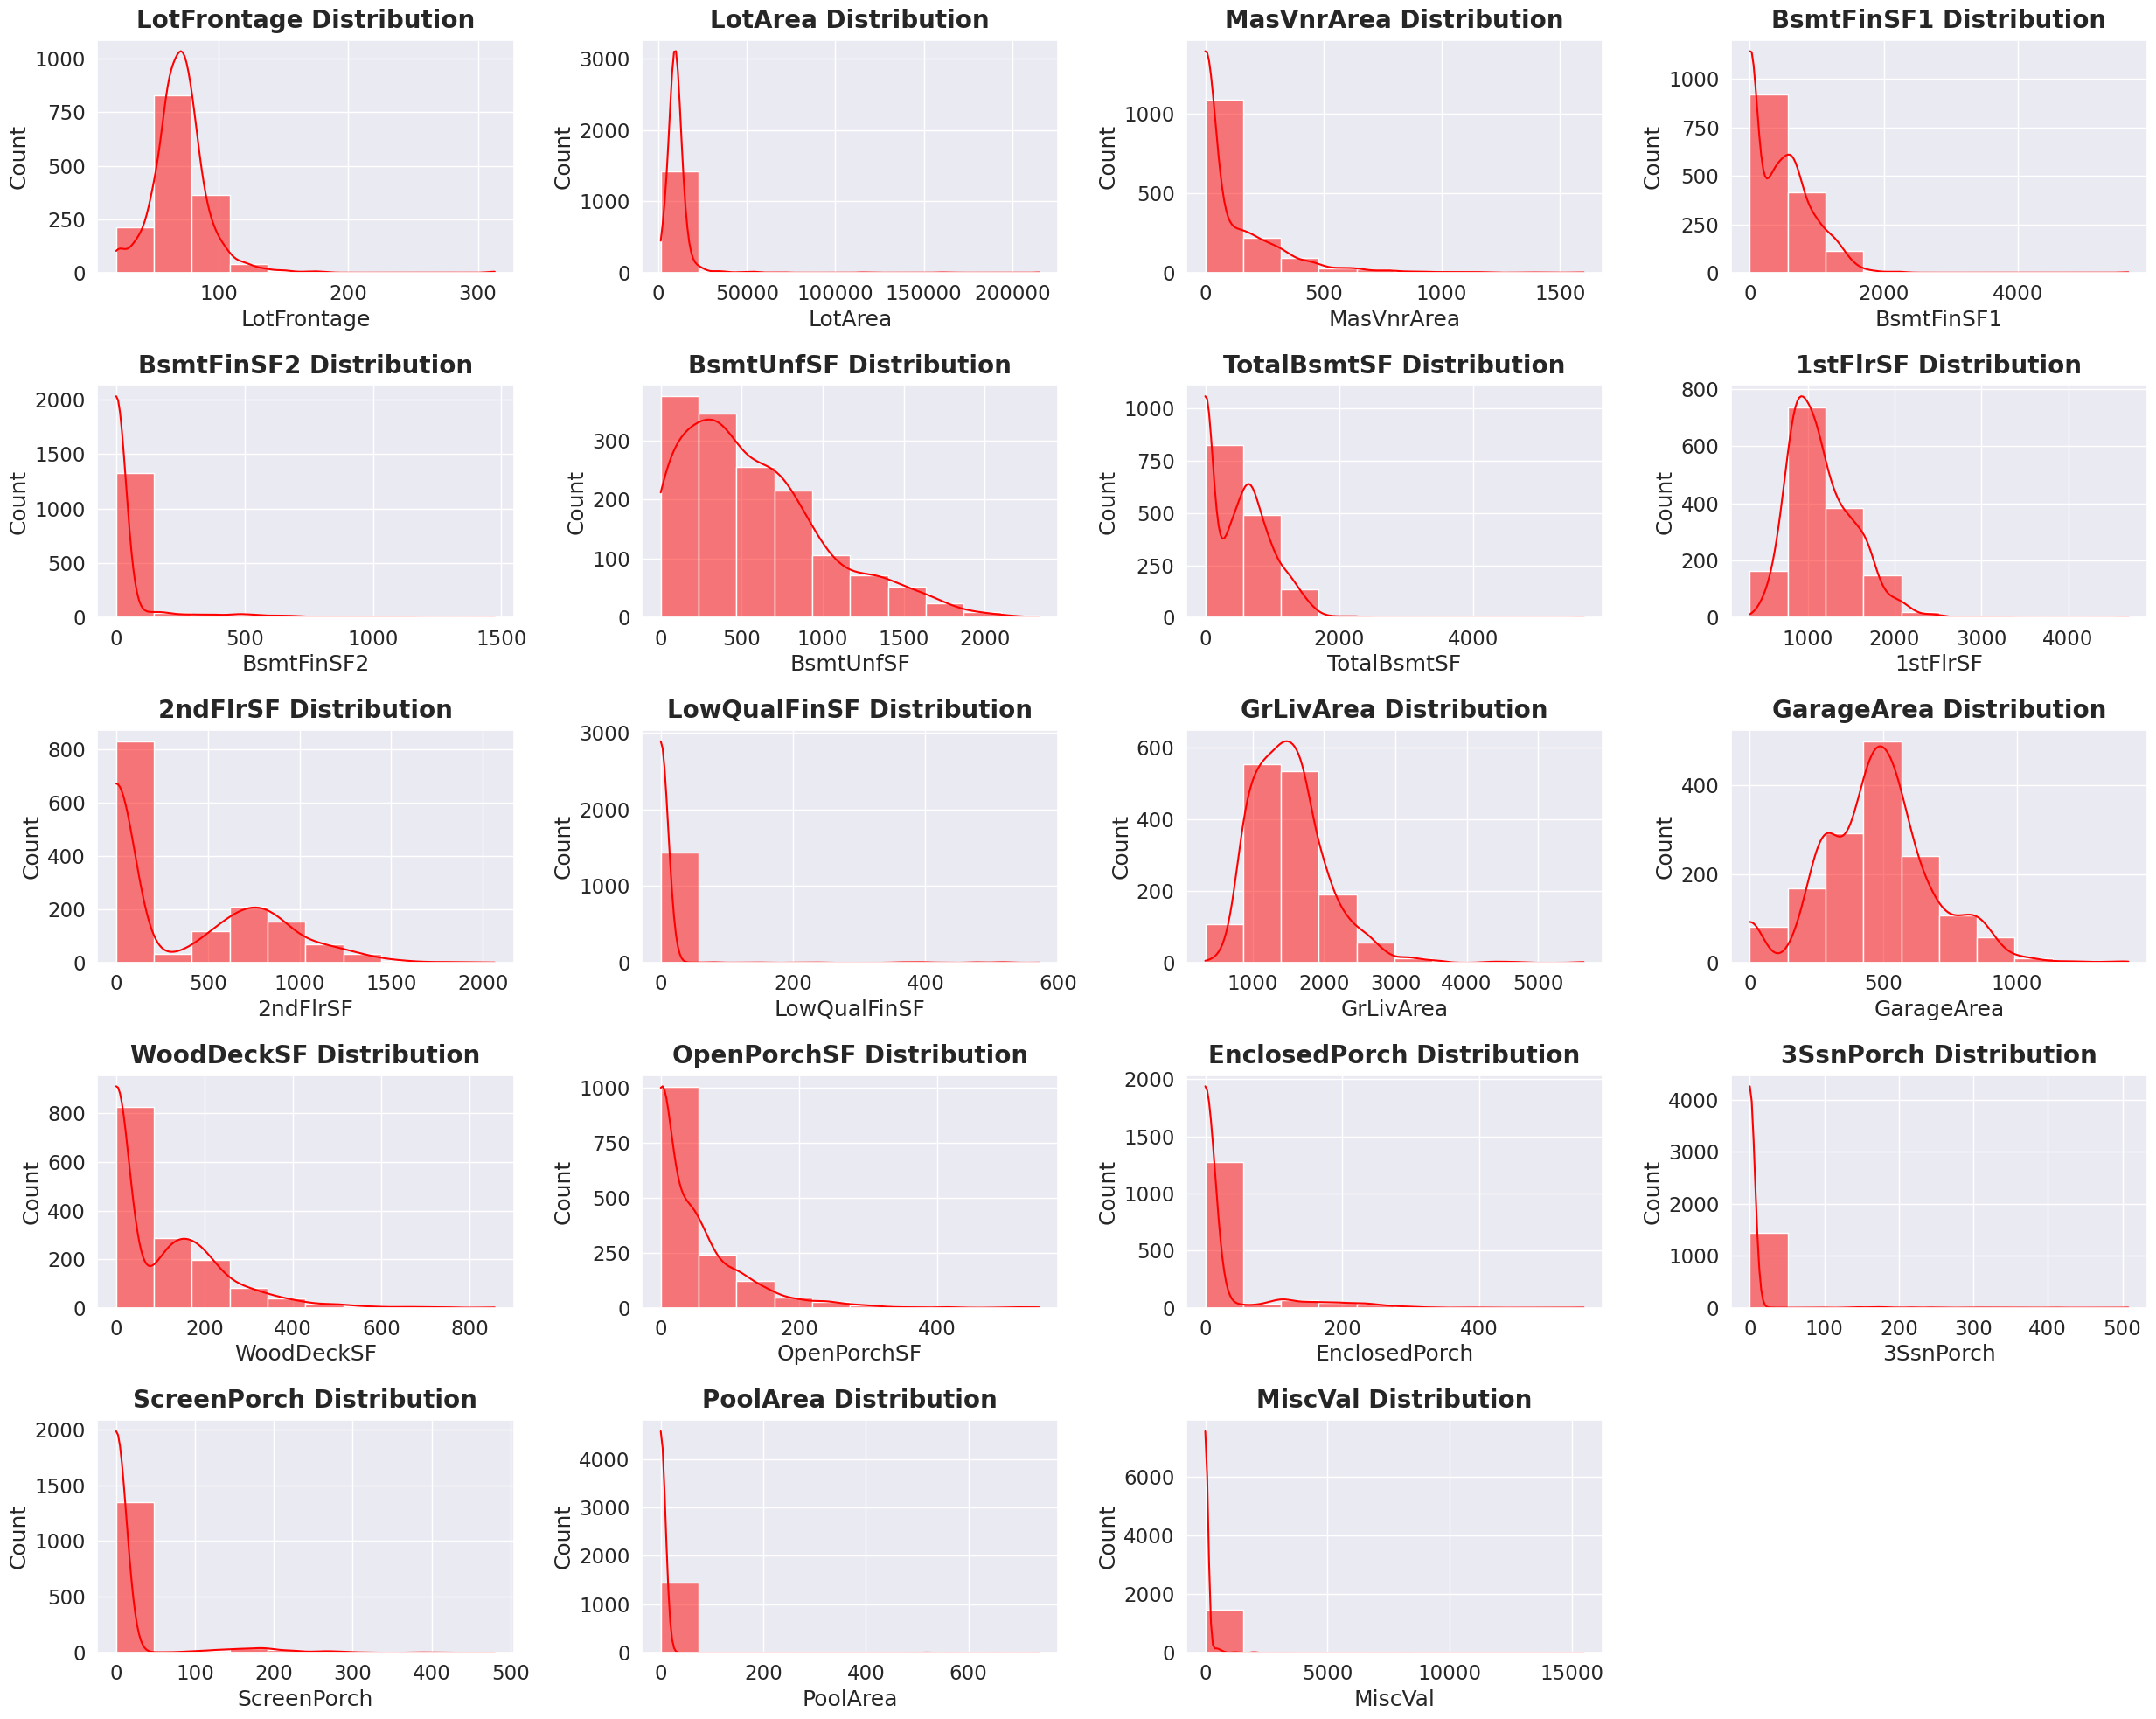

In [29]:
plt.figure(figsize=(25,20))
for index,column in enumerate(con_cols):
    plt.subplot(5,4,index+1)
    sns.histplot(train_df[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **GargeArea Feature** is having a **kind of Normal Distribution.**
* **None of the other featurs** is having a **normal distribution** and all the features is **right-skewed.**
* We know that **Linear regression** models assume a **linear relationship** between the **predictors and the response variable.**
* Since the **relationship is non-linear, transforming** the variables can **help capture and represent the underlying non-linear relationship more accurately.**

---

### 4. Visualizing the Skewness of Continous Numerical Features.

---

### 6. Visualizing Categorical Features w.r.t SalePrice.

In [32]:
cat_cols = train_df.select_dtypes(include="object").columns.tolist()

In [33]:
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=train_df)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

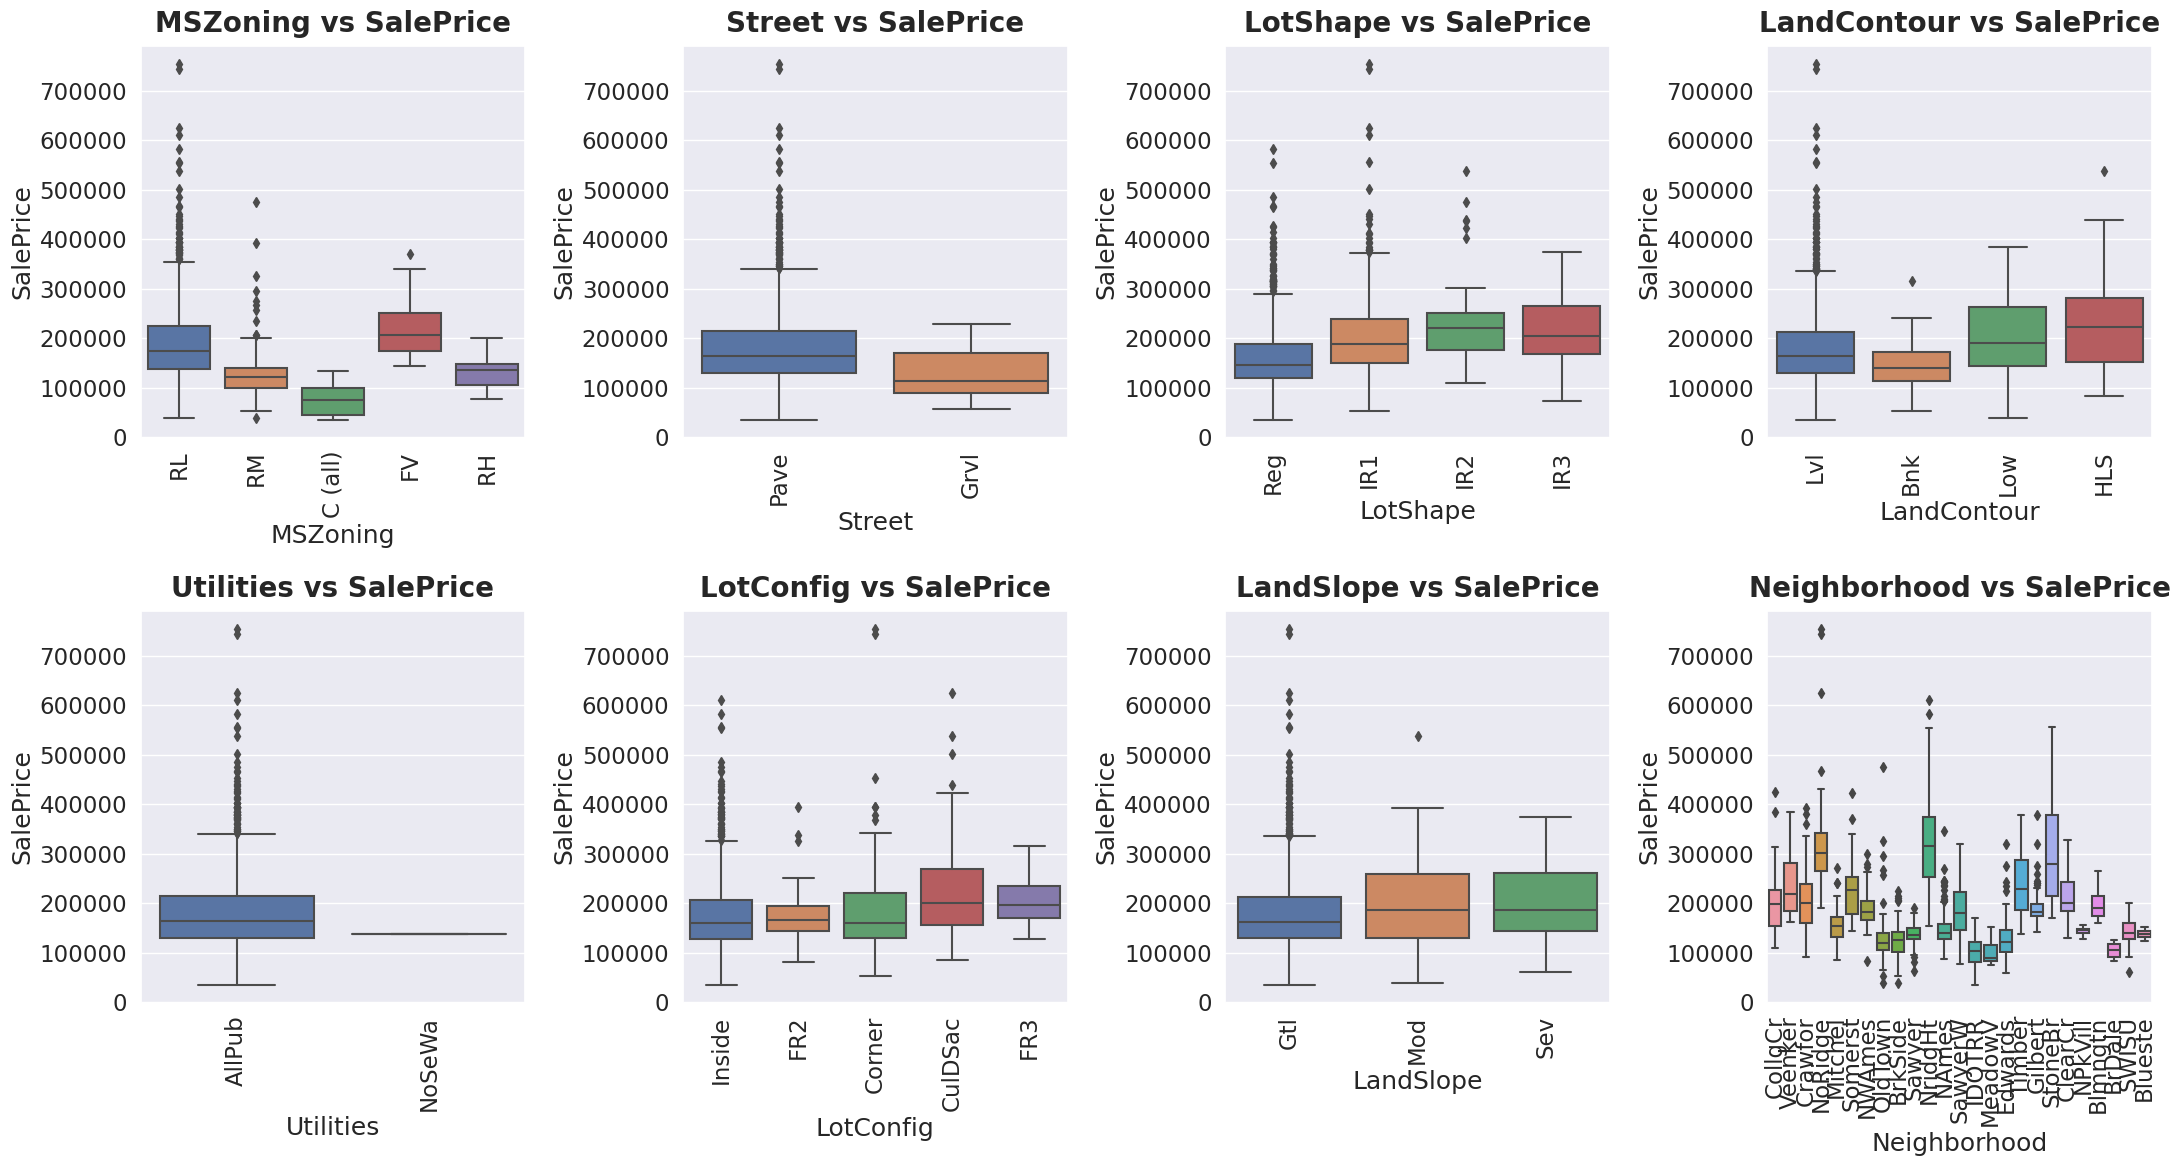

In [34]:
boxplot(cat_cols[0:8])

#### Dropping Columns with High Class-Imbalance.

In [35]:
train_df.drop(columns=["Utilities","Street"],inplace=True)
test_df.drop(columns=["Utilities","Street"],inplace=True)

---

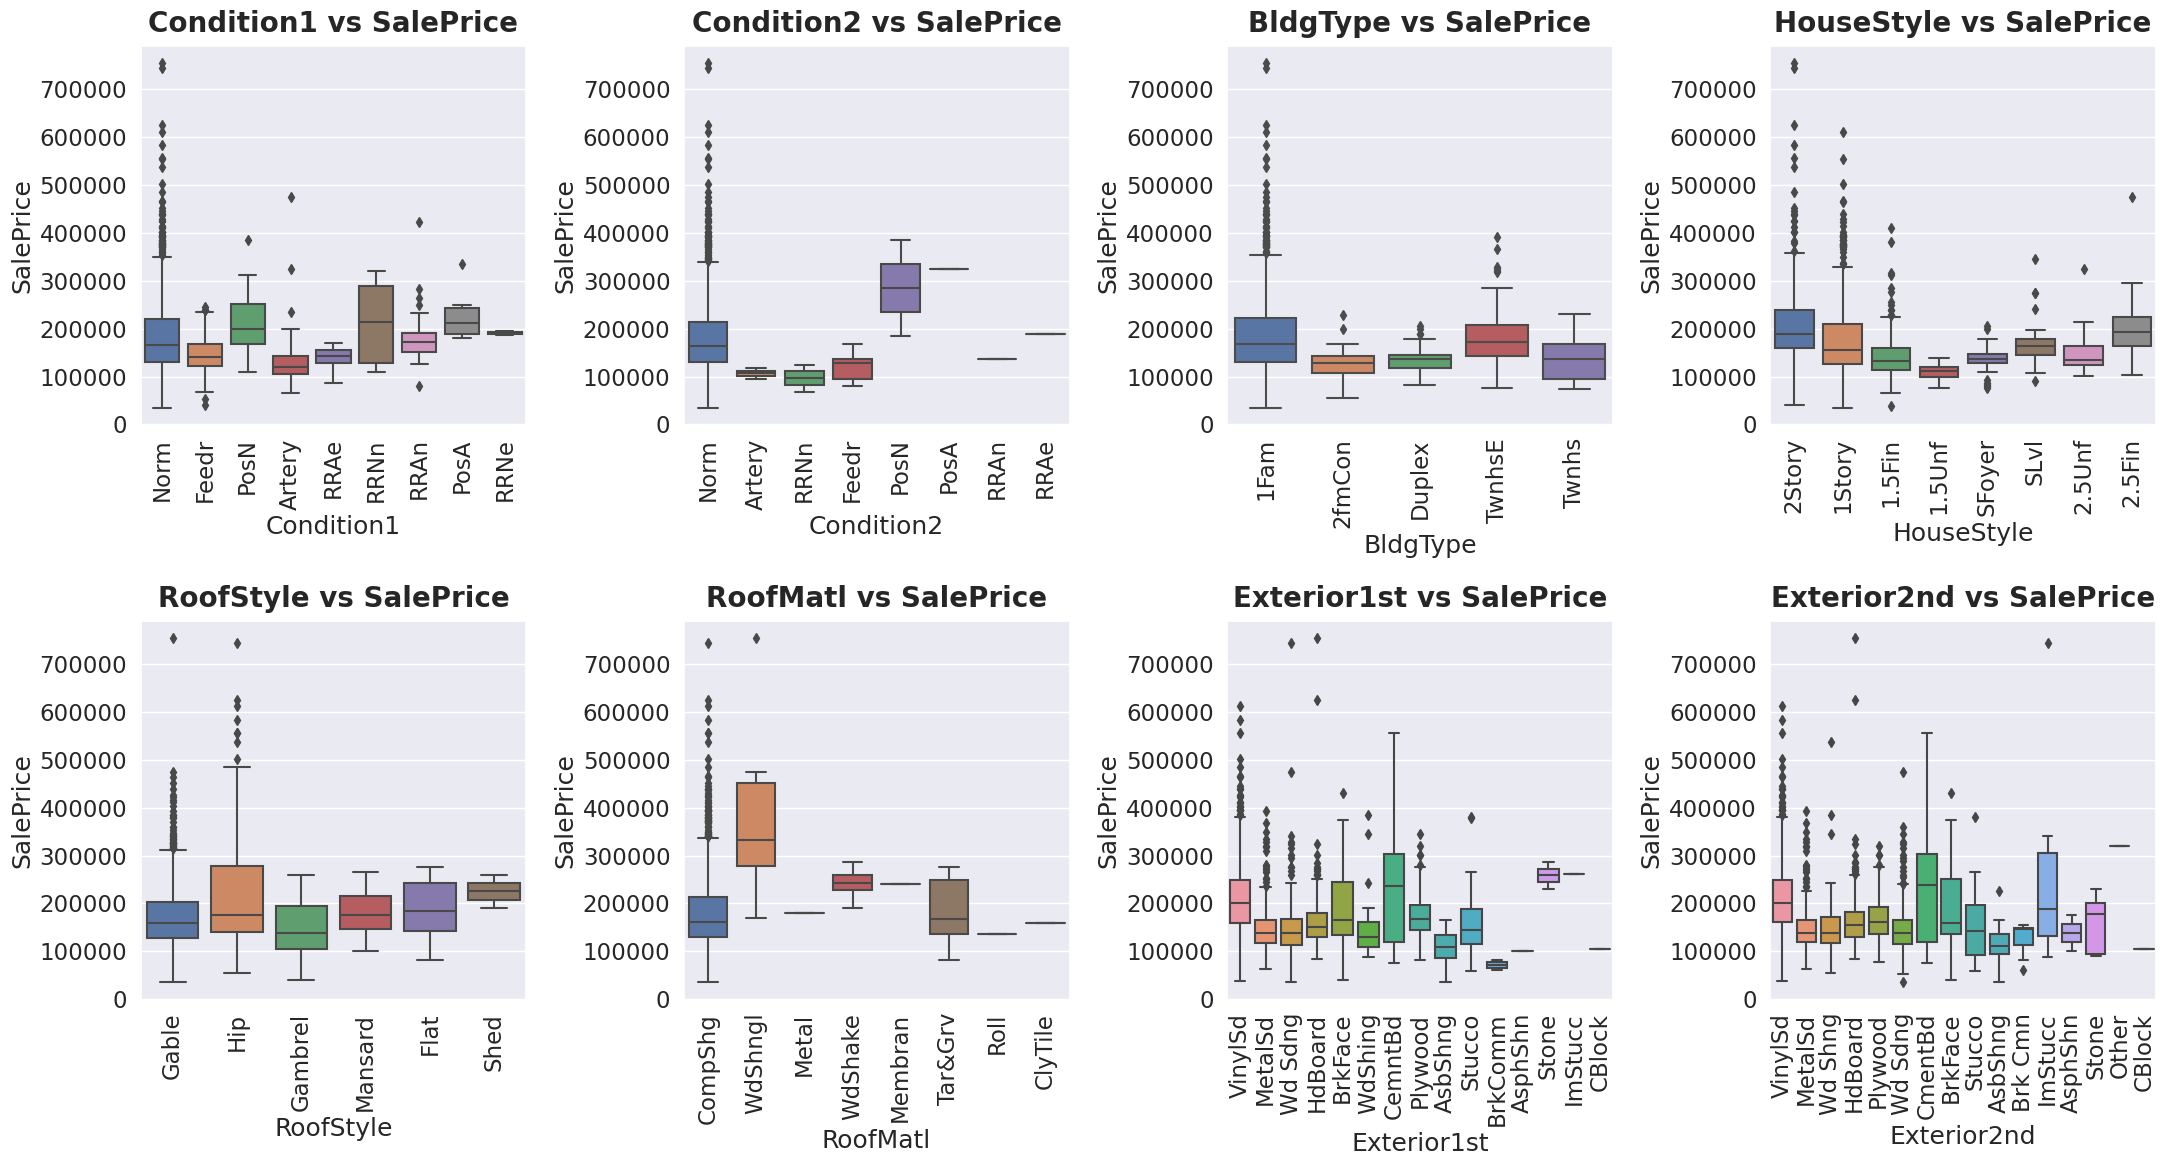

In [36]:
boxplot(cat_cols[8:16])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Features like **`Condition2`** and **`RoofMatl`** are having **very high class imbalance.**
* We can **drop RooftMatl** feature and we will fo **feature engineering** on **condition2** to **reduce the class-imbalance.** 

#### Dropping feature with high class-imbalance.

In [37]:
train_df.drop(columns=["RoofMatl"],inplace=True)
test_df.drop(columns=["RoofMatl"],inplace=True)

---

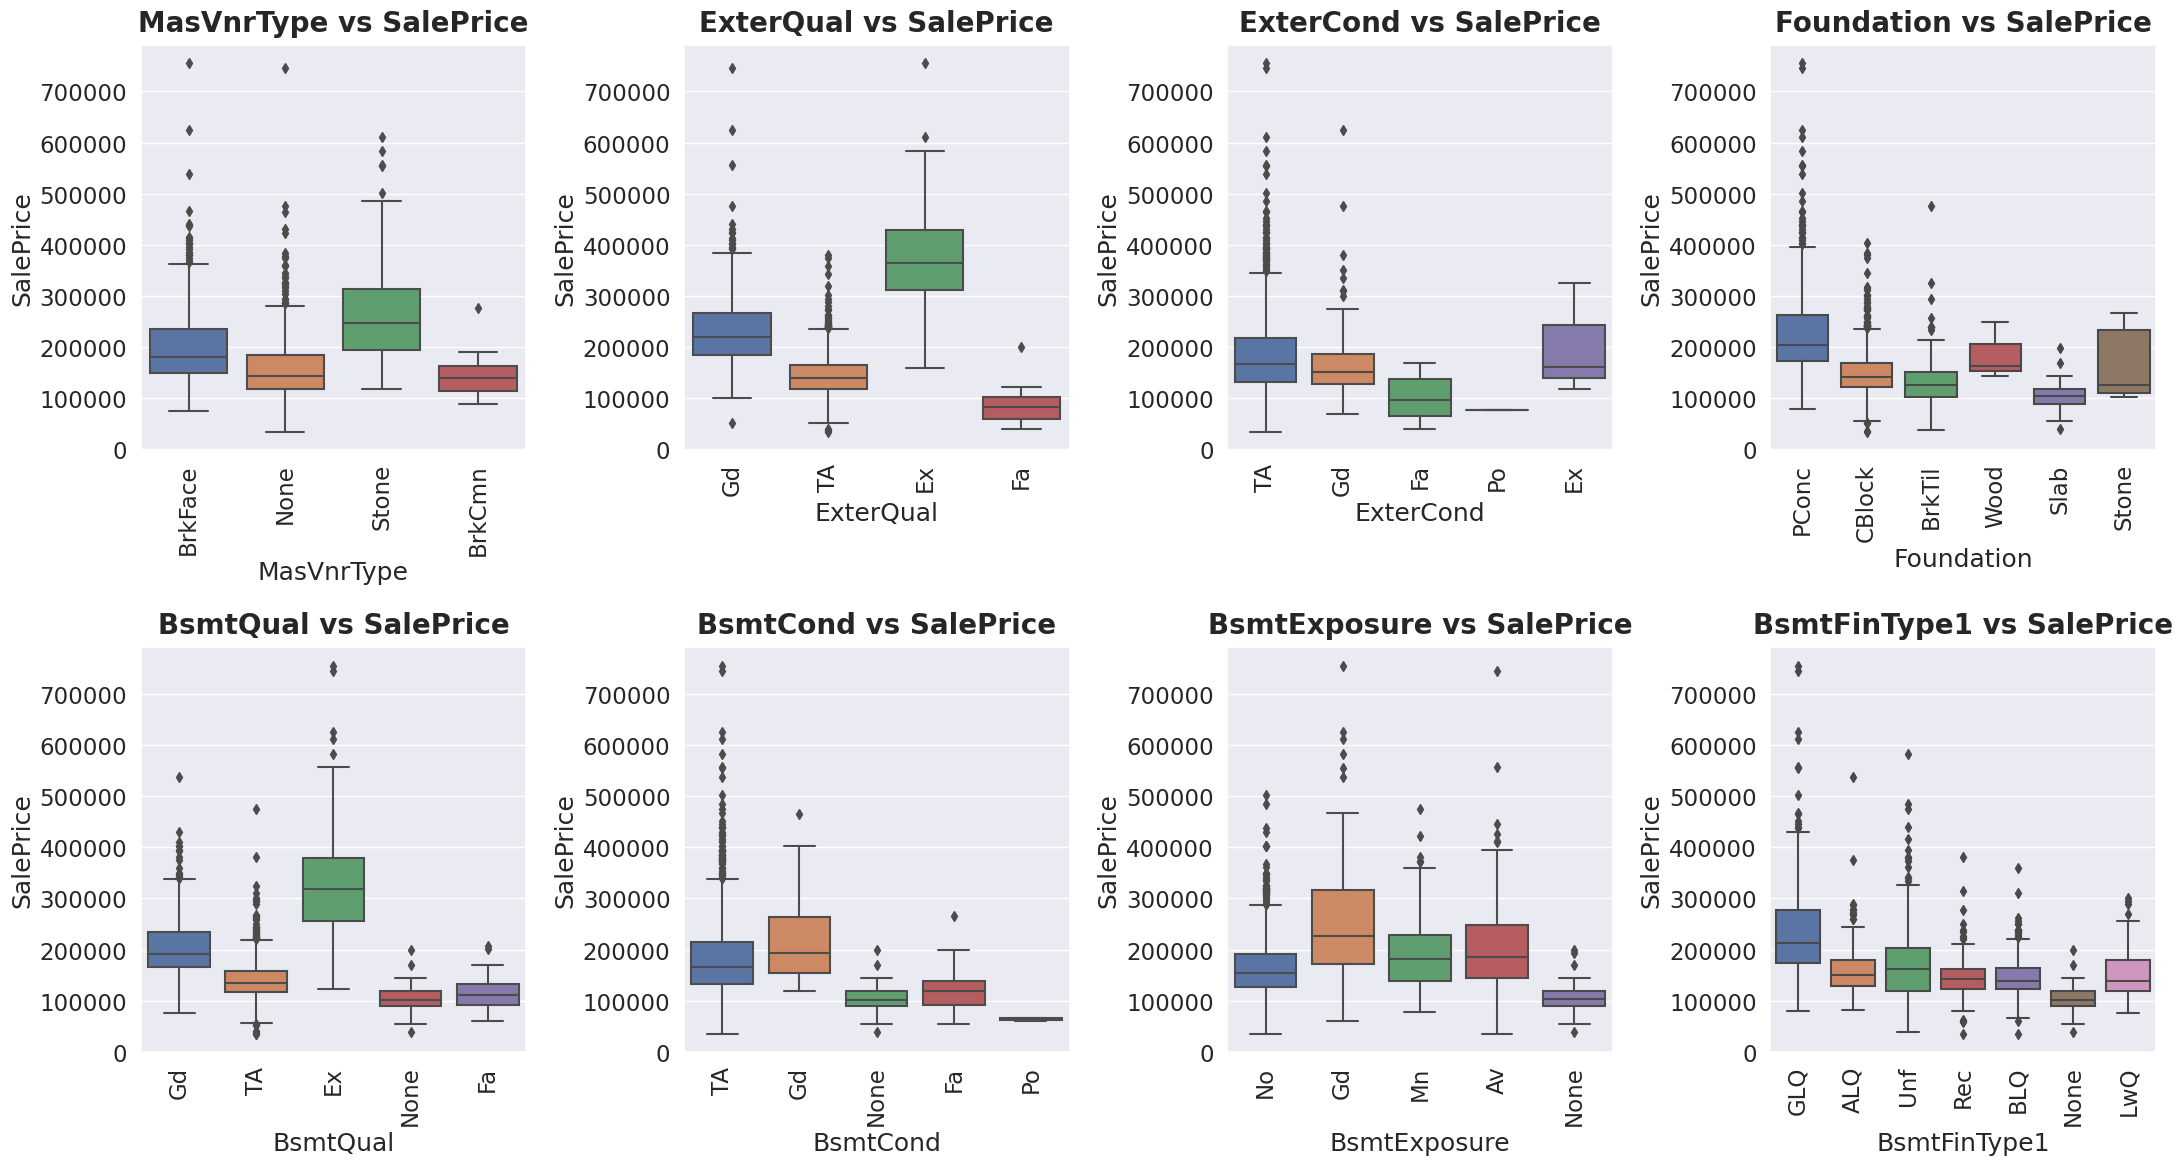

In [38]:
boxplot(cat_cols[16:24])

---

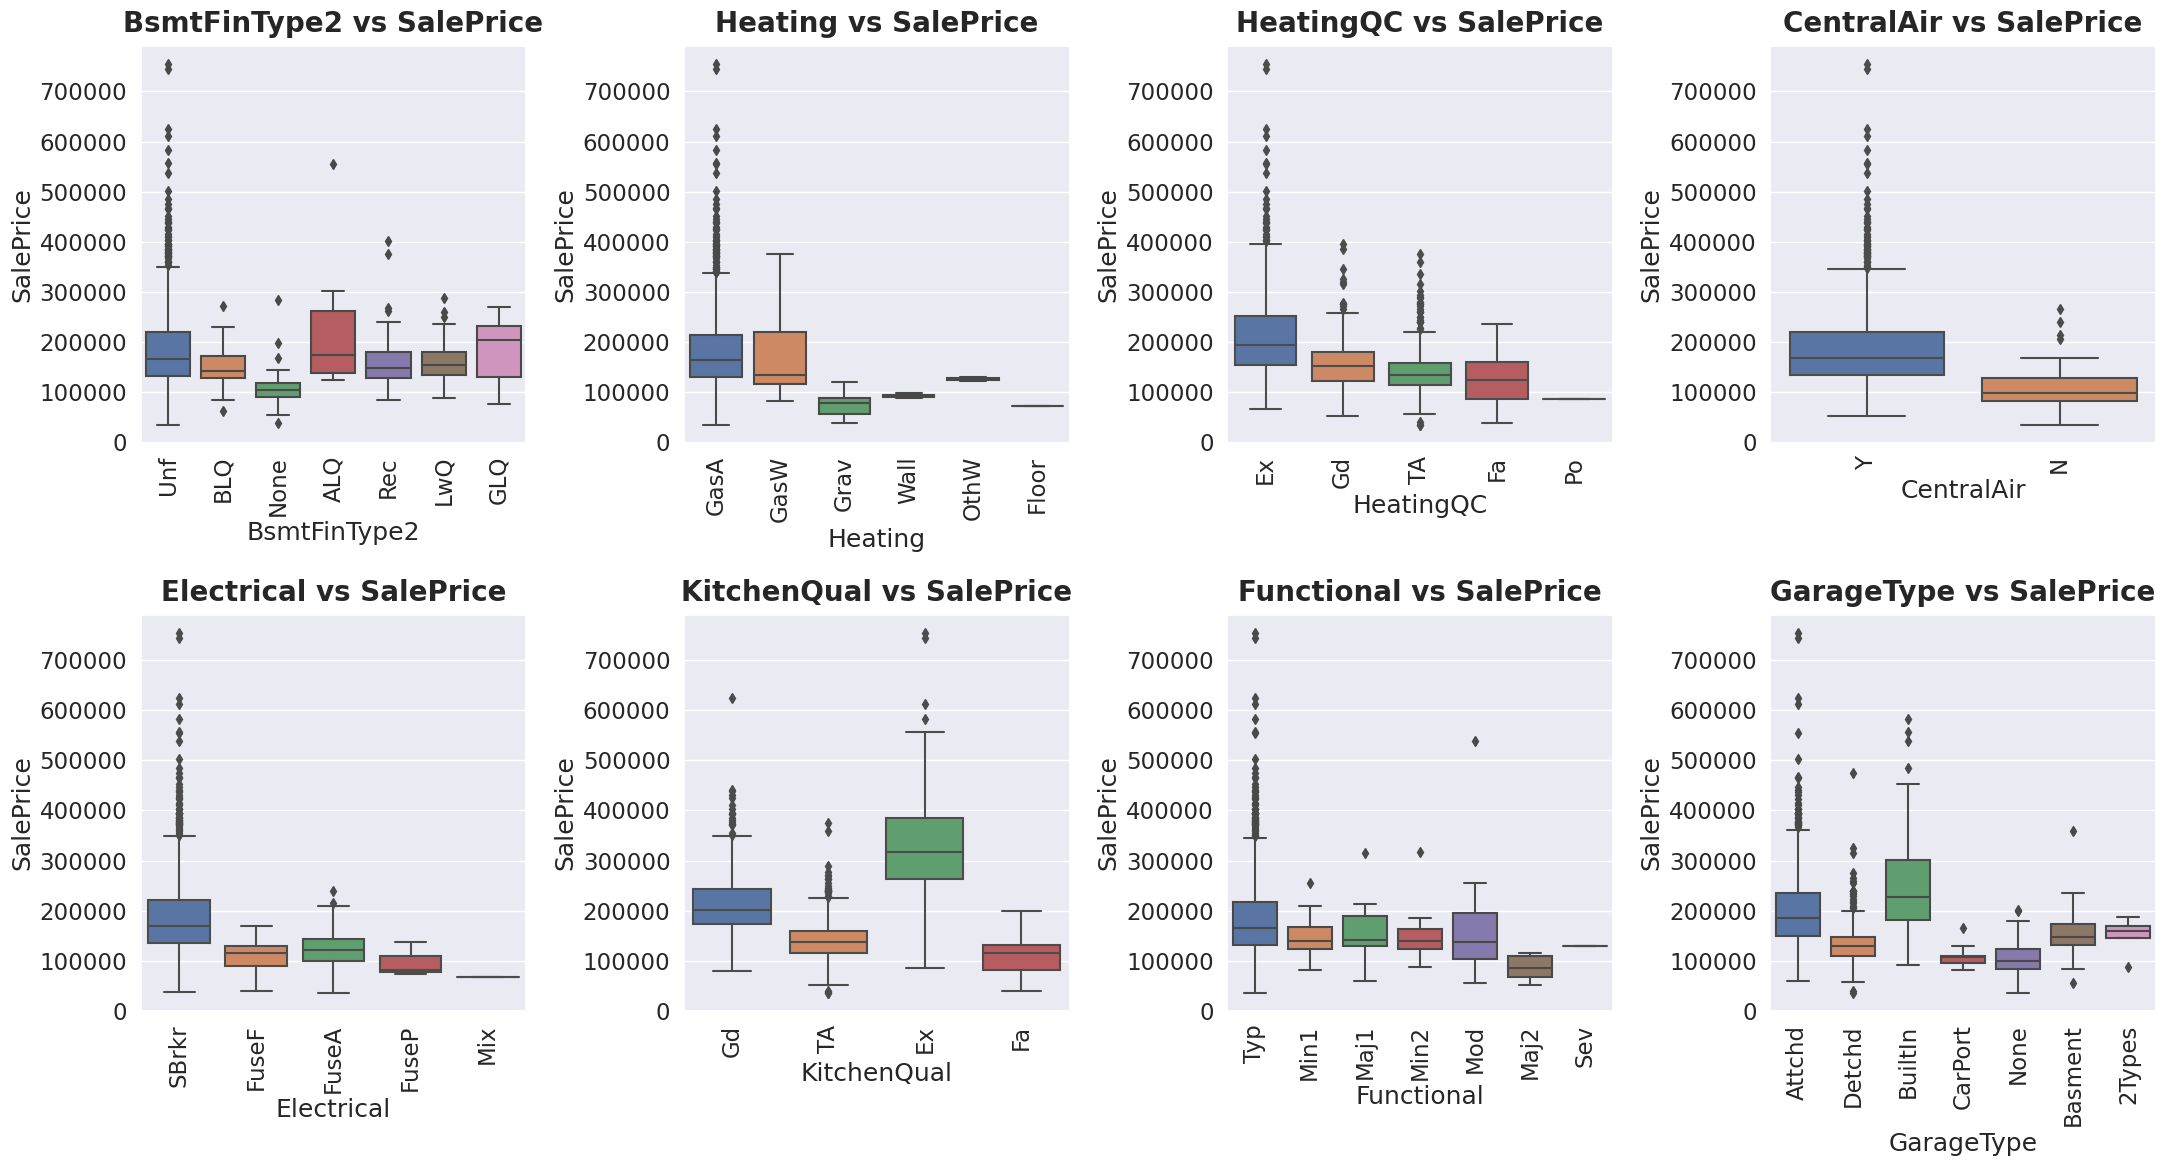

In [39]:
boxplot(cat_cols[24:32])

---

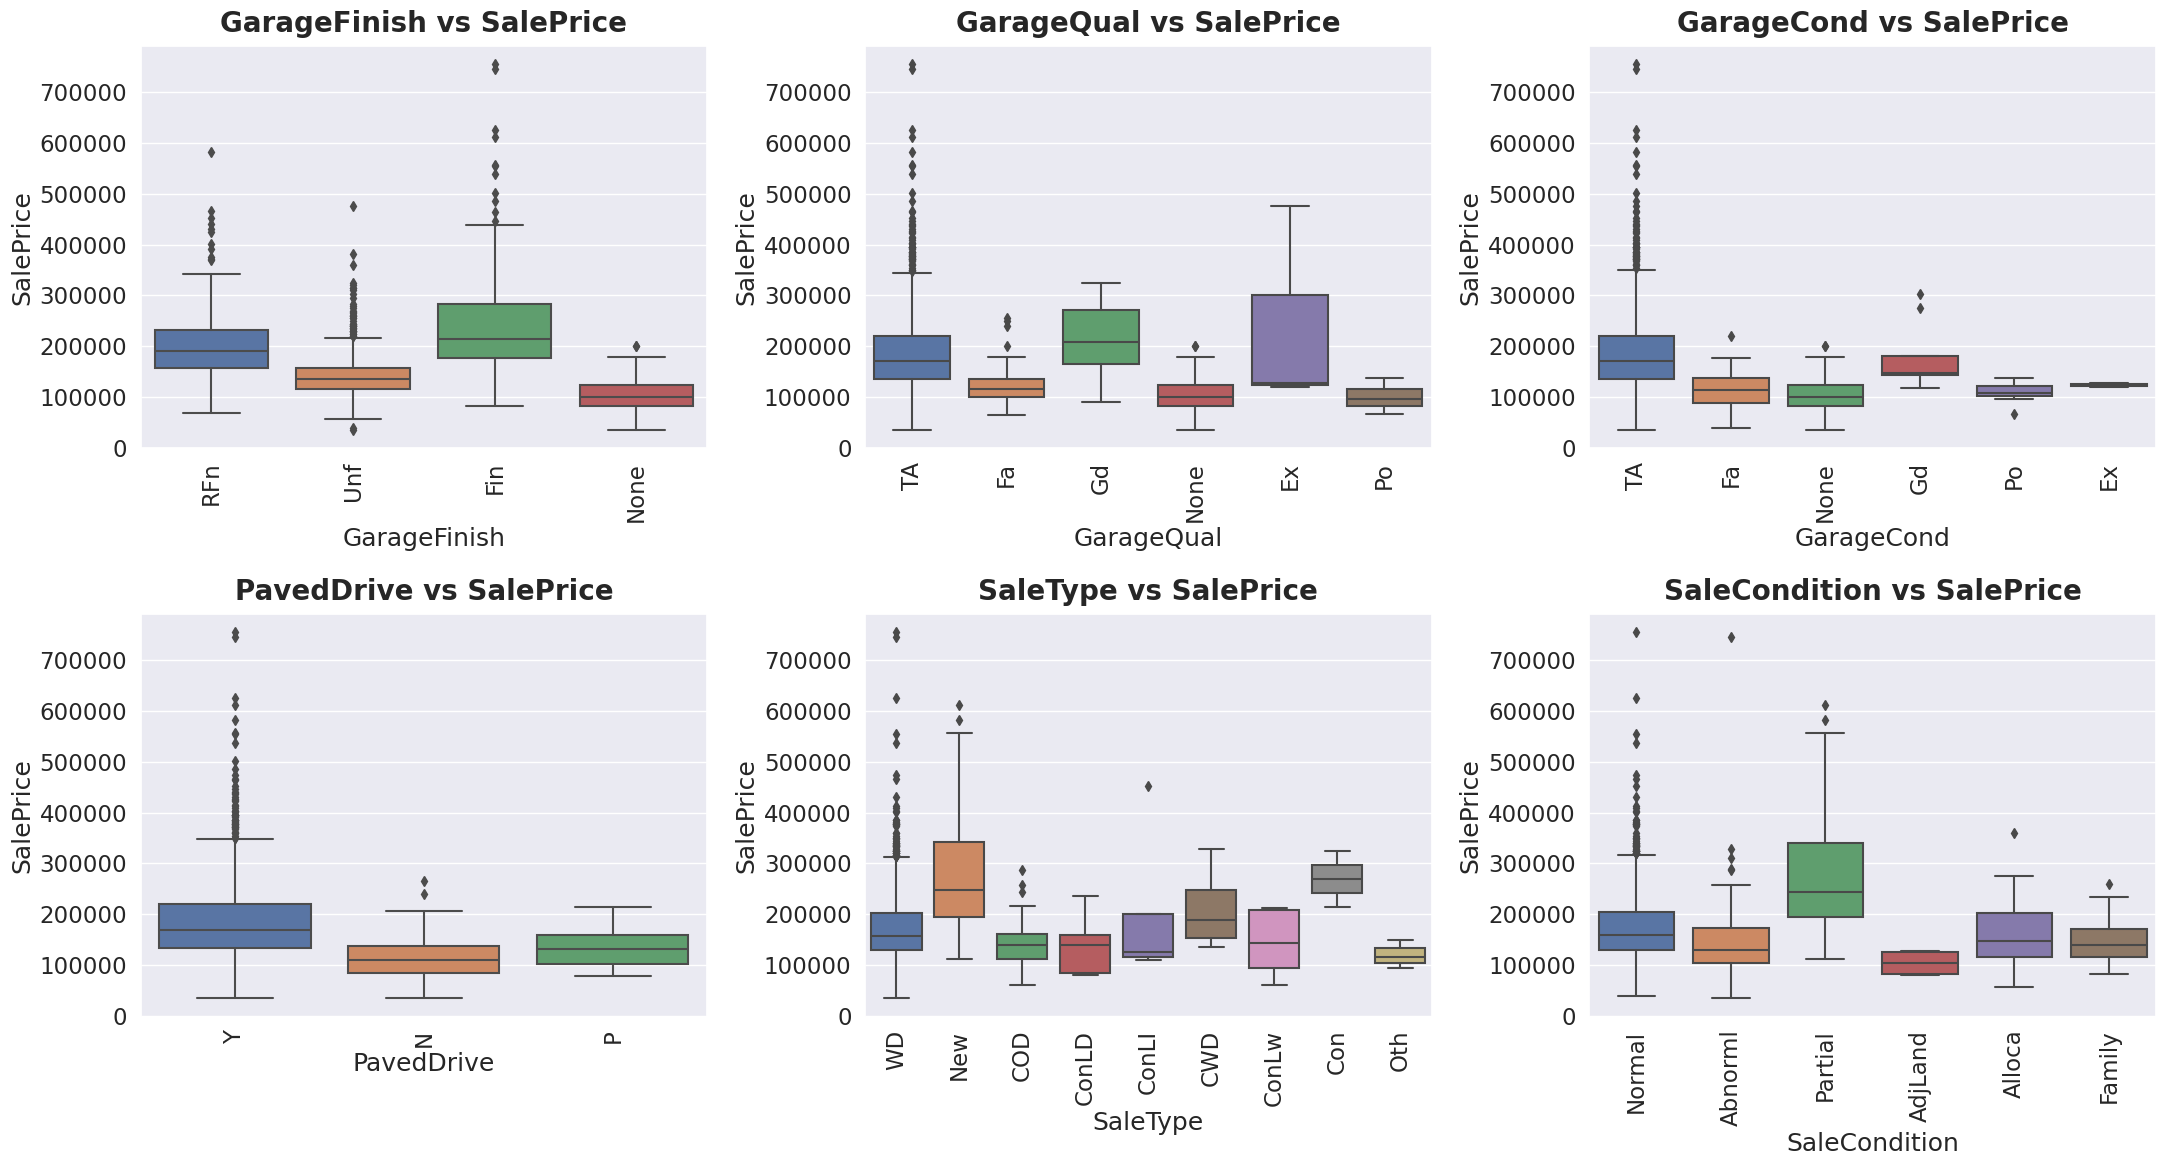

In [40]:
plt.figure(figsize=(22,12))
for index,column in enumerate(cat_cols[32:]):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df)
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

---

### 7. Visualizing Discrete Numerical Features w.r.t Average "SalePrice".

In [41]:
dis_cols = ["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
            "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold"]

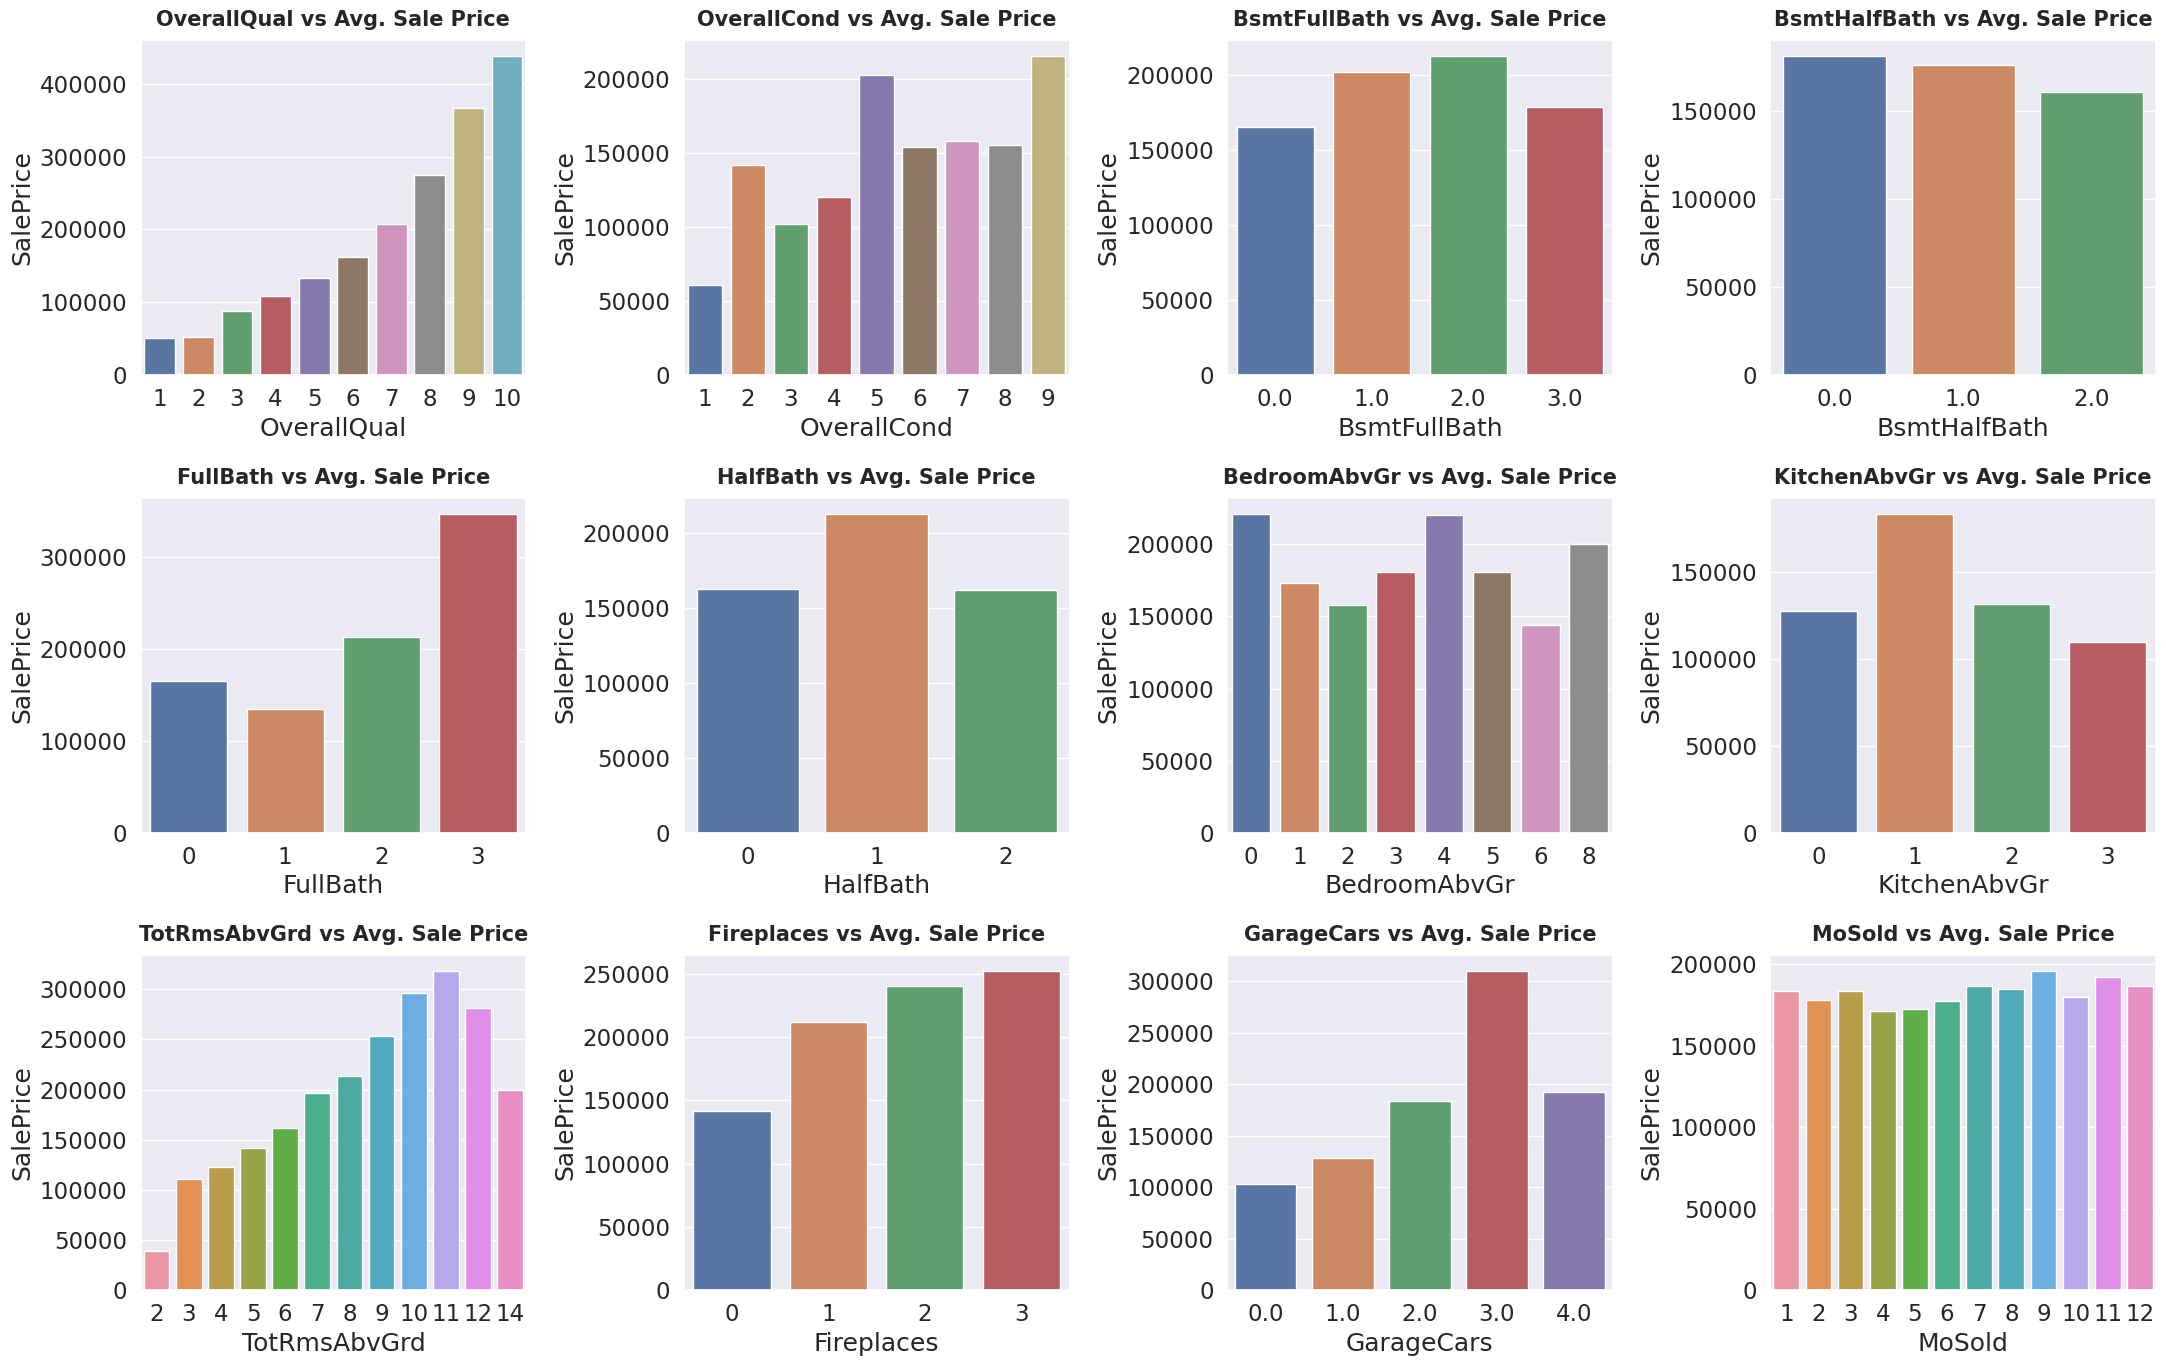

In [43]:
plt.figure(figsize=(22,14))
for index, column in enumerate(dis_cols):
    data = train_df.groupby(column)["SalePrice"].mean()
    plt.subplot(3, 4, index+1)
    sns.barplot(x=data.index, y=data)  # Using named parameters x and y
    plt.title(f"{column} vs Avg. Sale Price", fontweight="black", size=15, pad=10)
    plt.tight_layout()

In [44]:
train_df['RenovationStatus'] = (train_df['YearBuilt'] != train_df['YearRemodAdd']).astype(int)
test_df['RenovationStatus']  = (test_df['YearBuilt'] != test_df['YearRemodAdd']).astype(int)

In [45]:
train_df['AgeAtSale'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['AgeAtSale'] = test_df['YrSold'] - test_df['YearBuilt']

#### Dropping the Unwanted Features.

In [46]:
train_df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)
test_df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)

### Visualizing the New Features Created.

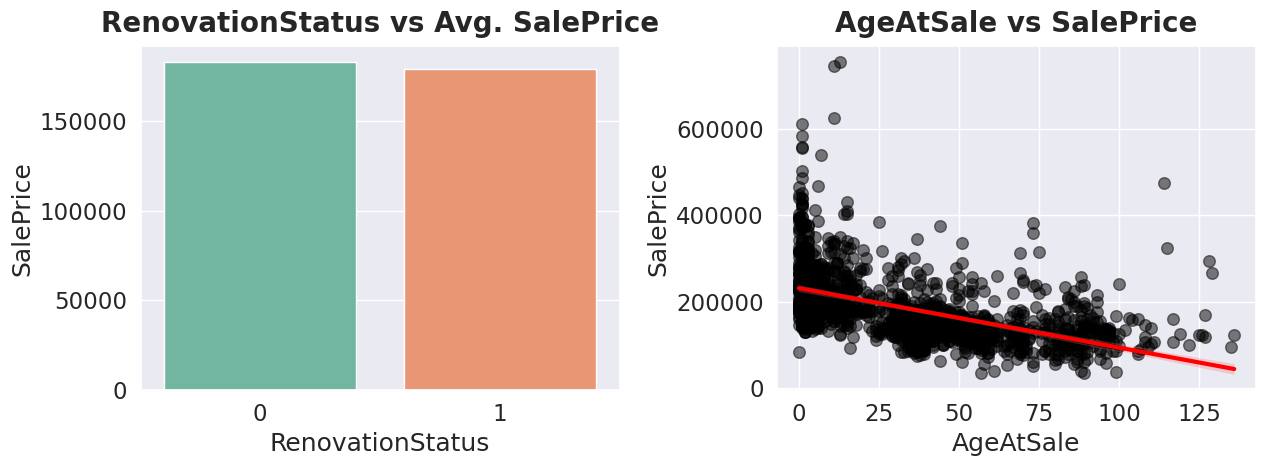

In [49]:
plt.figure(figsize=(13,5))

# First subplot: Barplot (RenovationStatus vs SalePrice)
plt.subplot(1,2,1)
data = train_df.groupby("RenovationStatus")["SalePrice"].mean()
sns.barplot(x=data.index, y=data, palette="Set2")  # Use x= and y=
plt.title("RenovationStatus vs Avg. SalePrice", pad=10, size=20, fontweight="black")

# Second subplot: Regplot (AgeAtSale vs SalePrice)
plt.subplot(1,2,2)
sns.regplot(x=train_df["AgeAtSale"], y=train_df["SalePrice"], color="black", 
            scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})  # Use x= and y=
plt.title("AgeAtSale vs SalePrice", pad=10, size=20, fontweight="black")

plt.tight_layout()
plt.show()

In [50]:
train_df["Total_Bathrooms"] = (train_df["FullBath"] + (0.5 * train_df["HalfBath"]) + 
                               train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]))

In [51]:
test_df["Total_Bathrooms"] = (test_df["FullBath"] + (0.5 * test_df["HalfBath"]) + 
                               test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"]))

### Visualiing "Total_Bathrooms" w.r.t  Average "SalePrice".

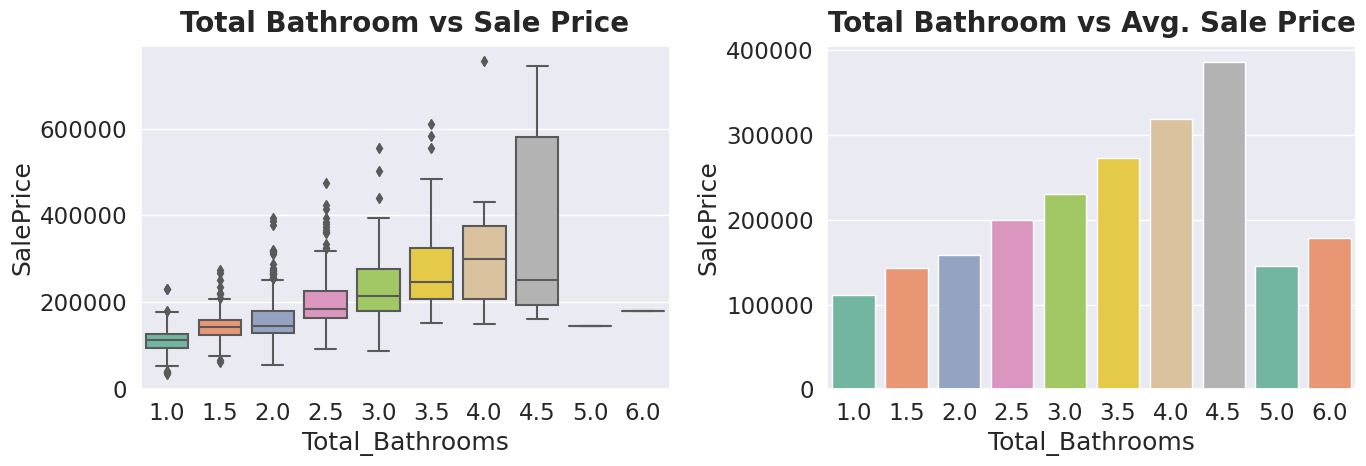

In [53]:
plt.figure(figsize=(14,5))

# First subplot: Boxplot (Total_Bathrooms vs SalePrice)
plt.subplot(1,2,1)
sns.boxplot(x=train_df["Total_Bathrooms"], y=train_df["SalePrice"], palette="Set2")  # Fixed: added x= and y=
plt.title("Total Bathroom vs Sale Price", fontweight="black", size=20, pad=10)

# Second subplot: Barplot (Avg. SalePrice per Total_Bathrooms)
plt.subplot(1,2,2)
avg = train_df.groupby("Total_Bathrooms")["SalePrice"].mean()
sns.barplot(x=avg.index, y=avg, palette="Set2")  # Fixed: added x= and y=
plt.title("Total Bathroom vs Avg. Sale Price", fontweight="black", size=20, pad=10)

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can clearly observe a **strong positive correlation** between **Total Bathrooms** and **SalePrice**.
* There's a **class-imbalance** because there are only **1 record** for **Total Bathrooms 5 & 6**.
* But still this **feature seems important** very important for **predicting Saleprice.**

---

## 3. Creatng a New Feature using all the columns related to "porch".

* **WoodDeckSF:**  Wood deck area in square feet.
* **OpenPorchSF:** Open porch area in square feet.
* **EnclosedPorch:** Enclosed porch area in square feet.
* **3SsnPorch:** Three season porch area in square feet.
* **ScreenPorch:** Screen porch area in square feet.
* **Note:-**
    * A **porch** is a covered outdoor **living space attached to a house**, typically used for relaxation or socializing.
    * So we can create a new feature **Total_Porch_SF** to indicate the **total porch Sqaure Feet** available.

In [ ]:
train_df['Total_Porch_SF'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +train_df['EnclosedPorch'] +
                              train_df['ScreenPorch'] + train_df['WoodDeckSF'])

In [ ]:
test_df['Total_Porch_SF'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] +test_df['EnclosedPorch'] +
                              test_df['ScreenPorch'] + test_df['WoodDeckSF'])

### Visualizing All These Features.

In [ ]:
cols = ["OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","Total_Porch_SF"]

plt.figure(figsize=(22,12))
for index,column in enumerate(cols):
    plt.subplot(2,3,index+1)
    sns.regplot(train_df[column],train_df["SalePrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
    plt.title(f"Correlation value is {corr}",pad=10,size=20,fontweight="black")
    plt.tight_layout()

### Dropping Features with Weak Correlation.

In [ ]:
cols = ["3SsnPorch","EnclosedPorch","ScreenPorch"]

train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

---

## 4. Creating a New Feature Using "Sqaure Footage".

* **BsmtFinSF1:** Type 1 finished square feet.
* **BsmtFinSF2:** Type 2 finished square feet.
* **BsmtUnfSF:** Unfinished square feet of basement area.
* **TotalBsmtSF:** Total square feet of basement area.
* **1stFlrSF:** First Floor square feet.
* **2ndFlrSF:** Second floor square feet.
* **Note:-**
    * By **adding all these square footage** values we can create a new feature **Total_sqr_footage.** indicating the total **square footage of house.**


### Visualizing All These Features.

In [61]:
def condition(df):
    df["Condition2"] = df["Condition2"].replace({"Norm":""}) #Norm means normal which indicates there's no second condition
    combined_condition = []
    for val1,val2 in zip(df["Condition1"],df["Condition2"]):
        if val2 == "":
            combined_condition.append(val1)
        elif val1==val2:
            combined_condition.append(val1)
        else:
            combined_condition.append(val1+val2)
            
    df["Combined_Condition"] = combined_condition
    df["ProximityStatus"] = (df["Combined_Condition"] == "Norm").astype(int)

In [62]:
condition(train_df)
condition(test_df)

### Dropping Columns Which are not Required Anymore.

In [63]:
train_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)
test_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)

---

## 6. Creating New Feature using "Heating" Feature.

In [64]:
train_df["HeatingQuality"] = train_df["Heating"] + "-" + train_df["HeatingQC"]
test_df["HeatingQuality"] = test_df["Heating"] + "-" + test_df["HeatingQC"]

#### Dropping Features which are not required anymore.

In [65]:
train_df.drop(columns=["Heating","HeatingQC"],inplace=True)
test_df.drop(columns=["Heating","HeatingQC"],inplace=True)

In [66]:
test_df["HeatingQuality"].replace({"Wall-Po":"Wall-TA"},inplace=True)

---

## 7. Creating Some New Boolean Features.

In [67]:
def boolean_feature(df):
    df["Has2ndFloor"] = (df['2ndFlrSF'] != 0).astype(int)
    df["HasGarage"]  = (df["GarageArea"] !=0).astype(int)
    df["HasBsmt"]    = (df["TotalBsmtSF"]!=0).astype(int)
    df["HasFirePlace"] = (df["Fireplaces"]!=0).astype(int) 

In [68]:
boolean_feature(train_df)
boolean_feature(test_df)

### Visualizing All These New Boolean Features.

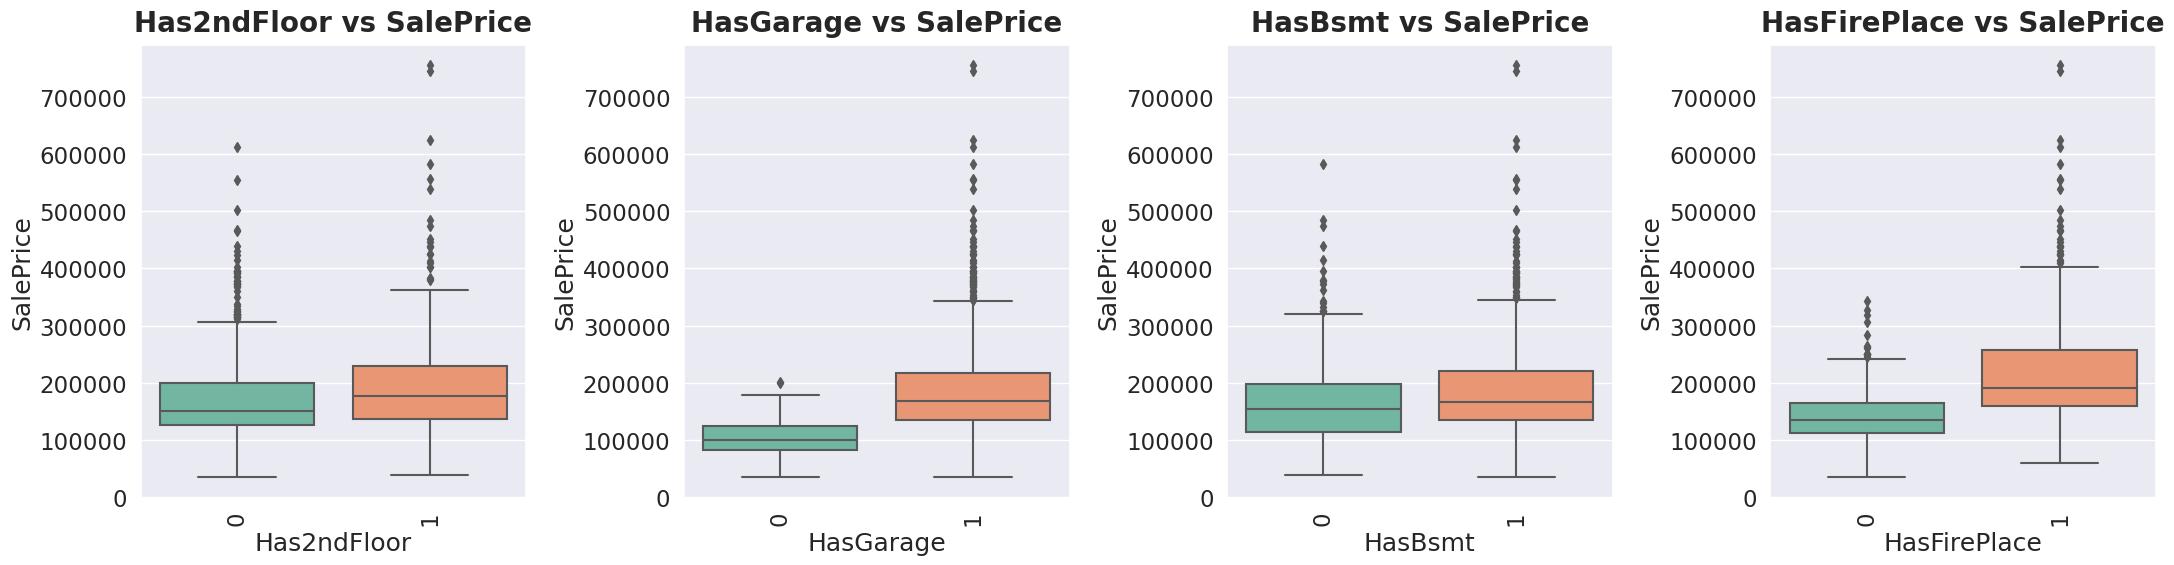

In [69]:
plt.figure(figsize=(22,6))
for index,column in enumerate(["Has2ndFloor","HasGarage","HasBsmt","HasFirePlace"]):
    plt.subplot(1,4,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df, palette="Set2")
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* All these features **seems very useful** for **model training.**

---

### 1. Performing Log Transformation on Target variable.

In [70]:
z = train_df["SalePrice"]

train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

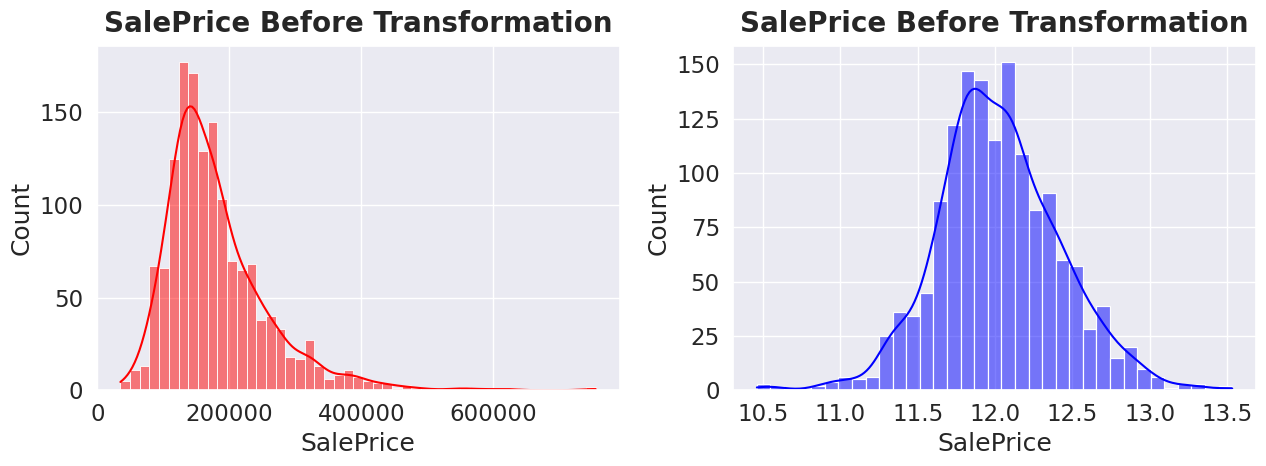

In [71]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(z,color="red",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")

plt.subplot(1,2,2)
sns.histplot(train_df["SalePrice"],color="blue",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can clearly onserve that **SalePrice** has been transformed to a **normal distribution**.
    
* This will help model in **`Homoscedasticity`**,**`Interpretability`** and **`Model Performance`**.

---

### 2. Applying Box-Cox Transformation on Continous Numerical Features to Reduce Skewness.

In [72]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
            "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","PoolArea","MiscVal","AgeAtSale","Total_Porch_SF",
            "Total_sqr_footage"]

In [75]:
con_cols = [col for col in con_cols if col in train_df.columns]  # Filter valid columns

In [76]:
for feature in con_cols:
    train_df[feature] = boxcox1p(train_df[feature], boxcox_normmax(train_df[feature] + 1))
    test_df[feature] = boxcox1p(test_df[feature] + 1, boxcox_normmax(train_df[feature] + 1))

In [77]:
train_df[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"})

Skewness
LotArea            -0.115445
Total_sqr_footage  -0.014054
AgeAtSale          -0.007442
1stFlrSF           -0.002743
LotFrontage         0.005408
GrLivArea           0.010278
GarageArea          0.197864
BsmtFinSF1          0.381504
TotalBsmtSF         0.405401
OpenPorchSF         0.625579
WoodDeckSF          0.777092
2ndFlrSF            0.884025
MasVnrArea          0.950364
MiscVal             5.203603
LowQualFinSF        7.394632
PoolArea           14.491174

---

### 3. Dropping Features with High Skewness Values.

In [78]:
cols = ["MiscVal","LowQualFinSF","PoolArea"]

train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

---

### 4. Performing Target Encoding on Categorical Features with High Cardinality.

In [79]:
cols = ["Neighborhood","Exterior1st","Exterior2nd","HeatingQuality"]
for column in cols:
    data = train_df.groupby(column)["SalePrice"].mean()
    for value in data.index:
        train_df[column] = train_df[column].replace({value:data[value]})
        test_df[column] = test_df[column].replace({value:data[value]})

---

### 5. Performing Label Encoding on Other Features.

In [80]:
cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond"]

In [81]:
encoder = LabelEncoder()

train_df[cols] = train_df[cols].apply(encoder.fit_transform)
test_df[cols] = test_df[cols].apply(encoder.fit_transform)

---

### 6. Applying One-Hot Encoding on Nominal Categorical Columns.

In [82]:
cols = train_df.select_dtypes(include="object").columns

In [83]:
train_df = pd.get_dummies(train_df, columns=cols)
test_df = pd.get_dummies(test_df,columns=cols)

In [84]:

train_df.shape

(1460, 146)

In [85]:
test_df.shape

(1459, 145)

---

### 7. Segregating Features and Labels For Model Training.

In [86]:
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

---

### 8. Feature Scaling using RobustScaler.

In [87]:
scaler =RobustScaler()

In [88]:
X_scaled = scaler.fit_transform(X)
test_df = scaler.fit_transform(test_df)

---

### 9. Splitting Data For Model Training & Testing.

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)

In [90]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1168, 145)
Dimension of x_test:=> (292, 145)
Dimension of y_train:=> (1168,)
Dimension of y_test:=> (292,)


---

## Creating  a Function to Train Model using Different Regression Algorithms.

In [91]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [92]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
   
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2) 
    
    print(f"R2 Score of the {model} model is=>",r2)
    print(f"Adjusted R2 Score of the {model} model is=>",adjusted_r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)
    

    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)    
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

---

R2 Score of the LinearRegression() model is=> 0.8476123791079906
Adjusted R2 Score of the LinearRegression() model is=> 0.6962685090440086

MAE of LinearRegression() model is=> 0.09261665838218319
MSE of LinearRegression() model is=> 0.023071191227890222
RMSE of LinearRegression() model is=> 0.1518920380661548


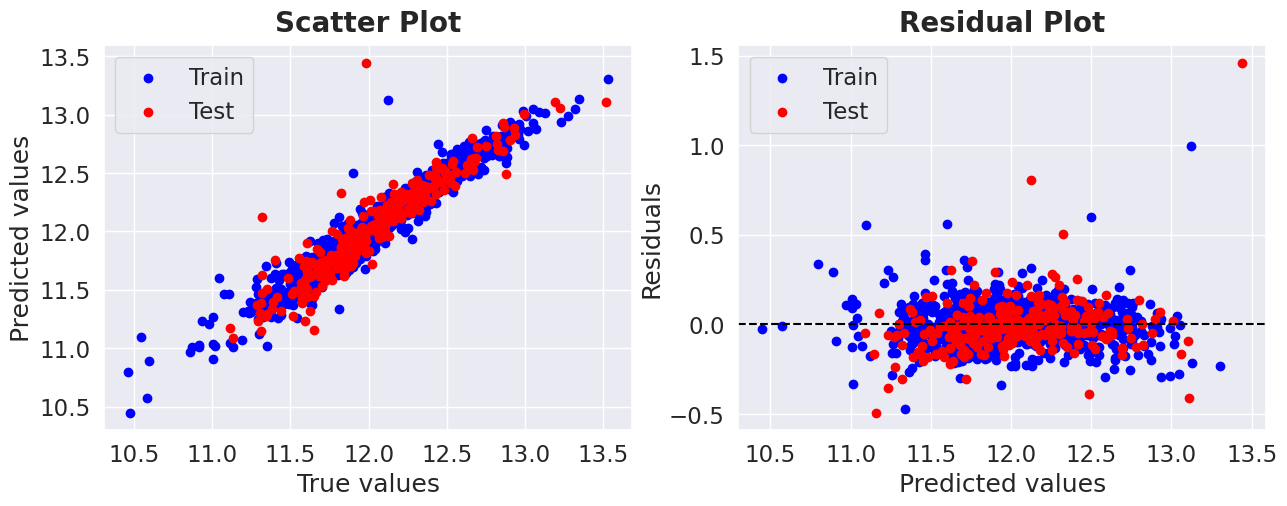

In [93]:
model_evaluation(LinearRegression())

---

R2 Score of the SVR() model is=> 0.6971255046826048
Adjusted R2 Score of the SVR() model is=> 0.39632549220984925

MAE of SVR() model is=> 0.14062046015118668
MSE of SVR() model is=> 0.04585461311499988
RMSE of SVR() model is=> 0.21413690273981242


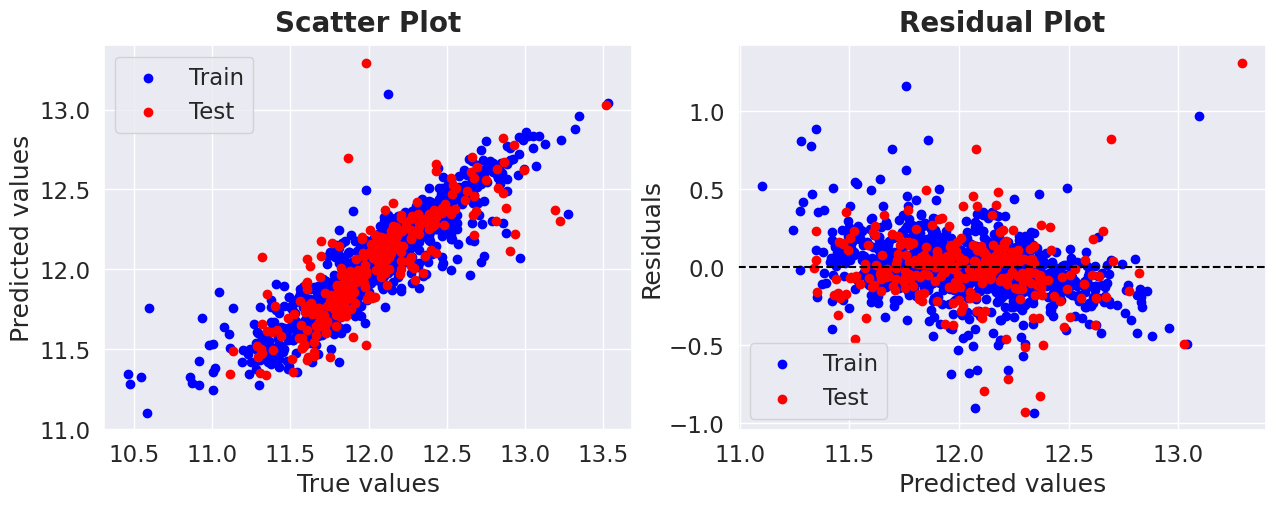

In [94]:
model_evaluation(SVR())

---

R2 Score of the RandomForestRegressor() model is=> 0.867192735179631
Adjusted R2 Score of the RandomForestRegressor() model is=> 0.7352951091594015

MAE of RandomForestRegressor() model is=> 0.09820950814143994
MSE of RandomForestRegressor() model is=> 0.020106763168742763
RMSE of RandomForestRegressor() model is=> 0.14179831863863113


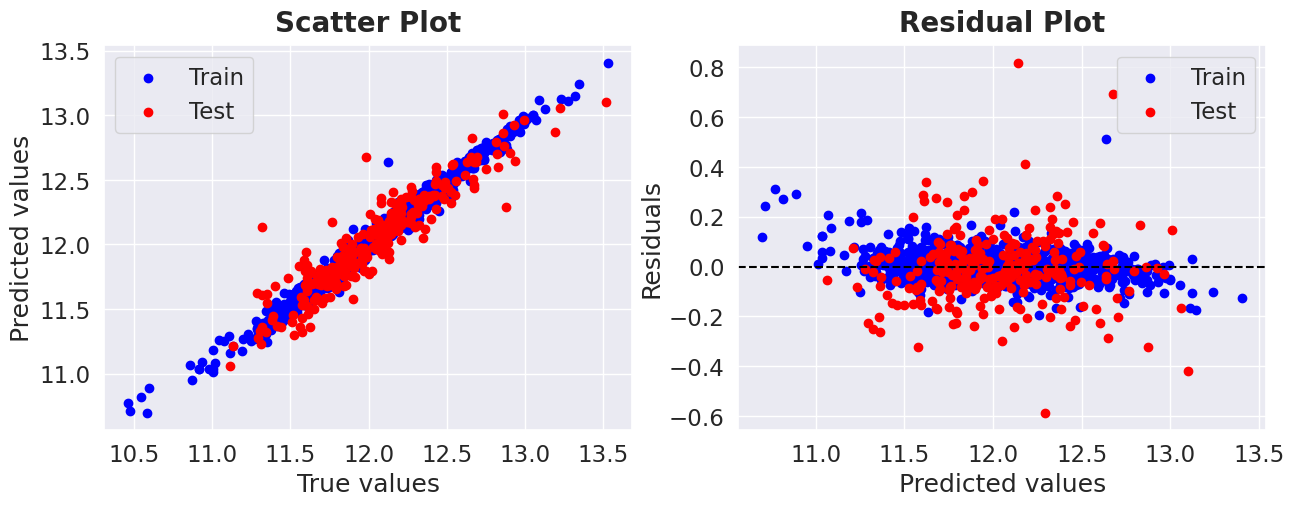

In [95]:
model_evaluation(RandomForestRegressor())

---

R2 Score of the AdaBoostRegressor() model is=> 0.8060329928337925
Adjusted R2 Score of the AdaBoostRegressor() model is=> 0.613394526812559

MAE of AdaBoostRegressor() model is=> 0.12938877662876988
MSE of AdaBoostRegressor() model is=> 0.029366229934151958
RMSE of AdaBoostRegressor() model is=> 0.17136577818850518


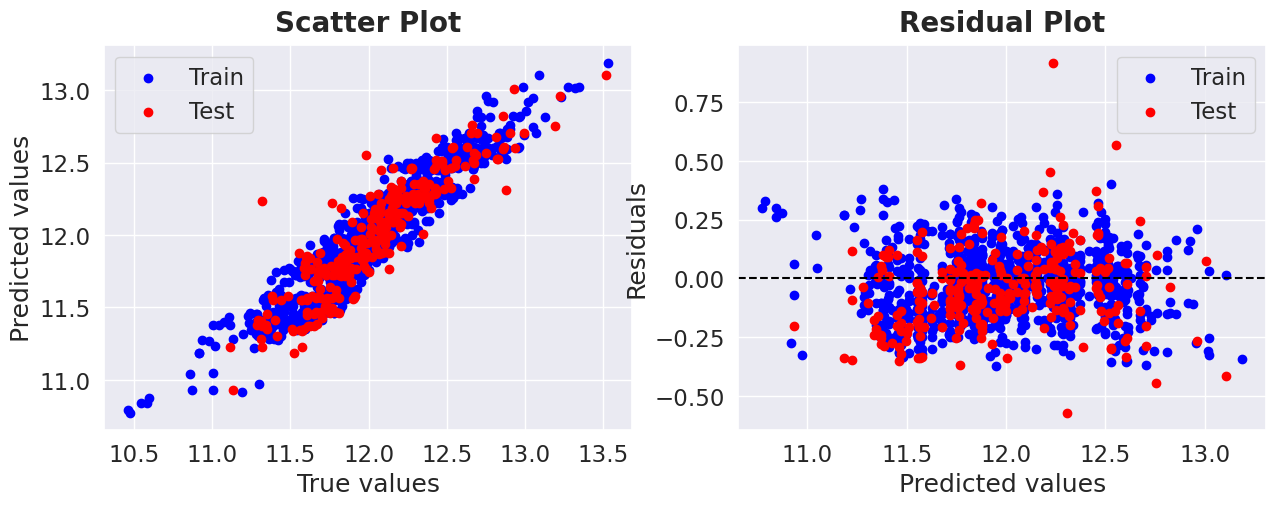

In [96]:
model_evaluation(AdaBoostRegressor())

---

R2 Score of the GradientBoostingRegressor() model is=> 0.8804464452079813
Adjusted R2 Score of the GradientBoostingRegressor() model is=> 0.7617117503802915

MAE of GradientBoostingRegressor() model is=> 0.09544437686009927
MSE of GradientBoostingRegressor() model is=> 0.018100177090732077
RMSE of GradientBoostingRegressor() model is=> 0.1345368986216498


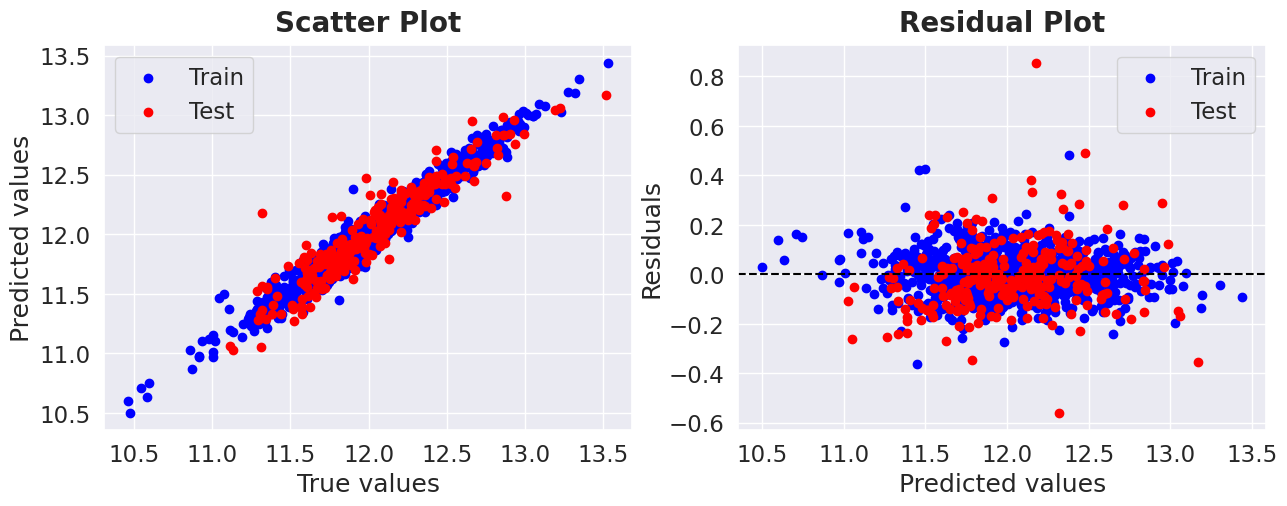

In [97]:
model_evaluation(GradientBoostingRegressor())

---

R2 Score of the LGBMRegressor() model is=> 0.8749920410088797
Adjusted R2 Score of the LGBMRegressor() model is=> 0.7508403009149589

MAE of LGBMRegressor() model is=> 0.09704486621369394
MSE of LGBMRegressor() model is=> 0.018925963342758798
RMSE of LGBMRegressor() model is=> 0.13757166620623157


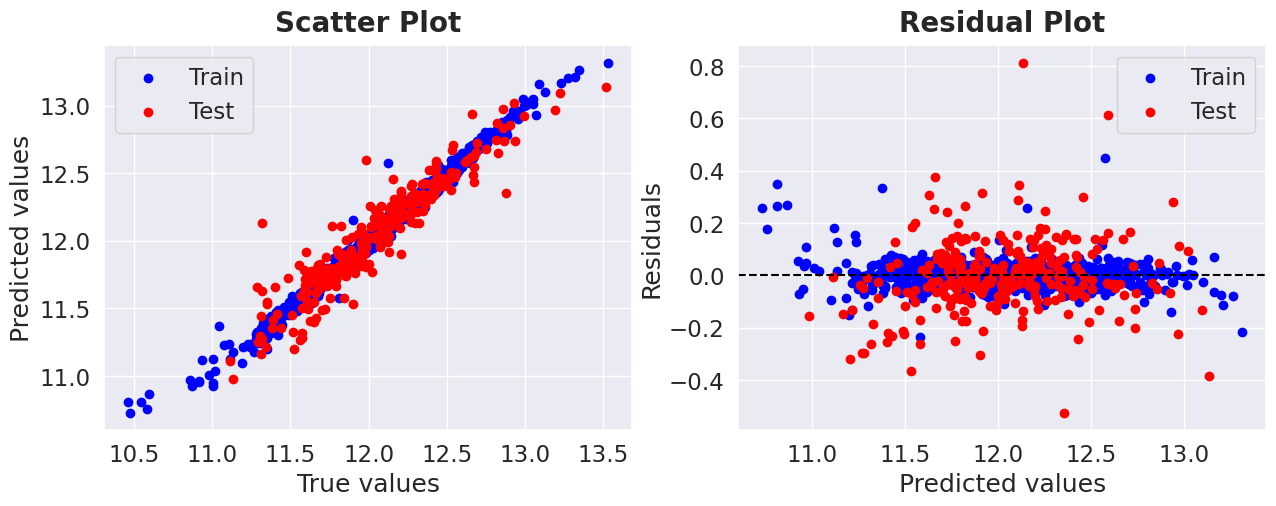

In [98]:
model_evaluation(LGBMRegressor())

---

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model is=> 0.8682854287194708
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
    

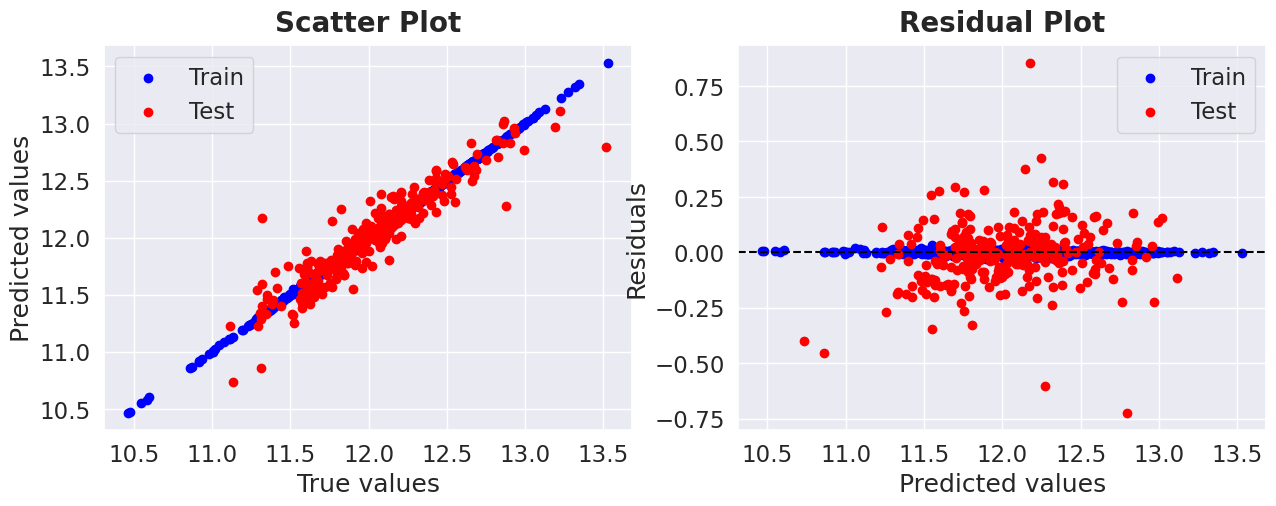

In [99]:
model_evaluation(XGBRegressor())

R2 Score of the <catboost.core.CatBoostRegressor object at 0x7e51a3faeaa0> model is=> 0.9022358661449844
Adjusted R2 Score of the <catboost.core.CatBoostRegressor object at 0x7e51a3faeaa0> model is=> 0.8051413496451402

MAE of <catboost.core.CatBoostRegressor object at 0x7e51a3faeaa0> model is=> 0.08353392277261326
MSE of <catboost.core.CatBoostRegressor object at 0x7e51a3faeaa0> model is=> 0.014801300881234464
RMSE of <catboost.core.CatBoostRegressor object at 0x7e51a3faeaa0> model is=> 0.12166059707742052


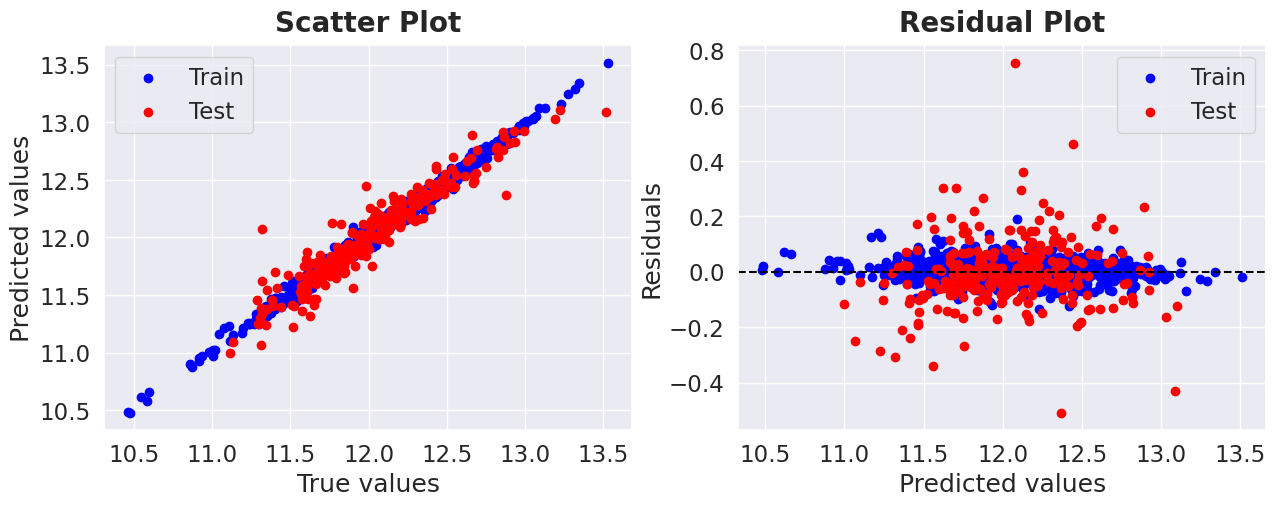

In [100]:
model_evaluation(CatBoostRegressor(verbose=False))

---

In [101]:
algos = ["LinearRegression","SVR","RandomForestRegresor","AdaBoostRegressor","GradientBosstRegressor",
         "LGBMRegressor","XGBosstRegressor","CatBoostRegressor"]

In [102]:
new_df = pd.DataFrame({"Model":algos,"R2_Score":r2_value,"Adjusted_R2_Score":adjusted_r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

In [103]:
new_df

Model  R2_Score  Adjusted_R2_Score       MAE       MSE  \
0        LinearRegression  0.847612           0.696269  0.092617  0.023071   
1                     SVR  0.697126           0.396325  0.140620  0.045855   
2    RandomForestRegresor  0.867193           0.735295  0.098210  0.020107   
3       AdaBoostRegressor  0.806033           0.613395  0.129389  0.029366   
4  GradientBosstRegressor  0.880446           0.761712  0.095444  0.018100   
5           LGBMRegressor  0.874992           0.750840  0.097045  0.018926   
6        XGBosstRegressor  0.868285           0.737473  0.095753  0.019941   
7       CatBoostRegressor  0.902236           0.805141  0.083534  0.014801   

       RMSE  
0  0.151892  
1  0.214137  
2  0.141798  
3  0.171366  
4  0.134537  
5  0.137572  
6  0.141214  
7  0.121661

---

In [104]:
catboost_model = CatBoostRegressor(verbose=False)

In [105]:
parameters1 = {"n_estimators":[50,100,150],
               "random_state":[0,42,50],
               "learning_rate":[0.1,0.3,0.5,1.0]}

In [106]:
grid_search = GridSearchCV(catboost_model, parameters1 , cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7e51a36f8e50>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [107]:
best_parameters = grid_search.best_params_
best_parameters

{'learning_rate': 0.1, 'n_estimators': 150, 'random_state': 42}

### Creating CatBoost Regressor model using Best Parameters.

In [108]:
catboost_model = CatBoostRegressor(**best_parameters, verbose=False)

In [109]:
catboost_model.fit(x_train,y_train)

In [110]:
y_pred = catboost_model.predict(x_test)

In [111]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8858999139929757
RMSE Score of model is: 0.13143261565757938
Adjusted_R2_Score of model is: 0.7725813354243558


---

In [112]:
gradient_model = GradientBoostingRegressor()

In [113]:
parameters2 = {"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "n_estimators":[50,100,150],
               "random_state":[0,42,45,50]}


### Creating GradientBossting Regressor Model Using Best-Parameters.

In [115]:
gradient_model = GradientBoostingRegressor(**best_parameters)

In [116]:
gradient_model.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=150, random_state=42)

In [117]:
y_pred2 = gradient_model.predict(x_test)

In [118]:
print("R2_Score of model is:",r2_score(y_test,y_pred2))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred2))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8874598287148836
RMSE Score of model is: 0.1305310858957073
Adjusted_R2_Score of model is: 0.7756904805207612


----

In [119]:
lgbm_model = LGBMRegressor()

In [120]:
parameters3 = {"boosting_type":['gbdt','dart','goss','rf'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "random_state":[0,42,45,50]}

In [121]:
grid_search_3 = GridSearchCV(lgbm_model, parameters3, cv=5)
grid_search_3.fit(x_train,y_train)

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check 

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'random_state': [0, 42, 45, 50]})

In [122]:
best_parameters3 = grid_search_3.best_params_
best_parameters3

{'boosting_type': 'goss', 'learning_rate': 0.1, 'random_state': 50}

### Creating LGBM Model using Best Parameters.

In [123]:
lgbm_model = LGBMRegressor(**best_parameters3)

In [124]:
lgbm_model.fit(x_train,y_train)

LGBMRegressor(boosting_type='goss', random_state=50)

In [125]:
y_pred3 = lgbm_model.predict(x_test)

In [126]:
print("R2_Score of model is:",r2_score(y_test,y_pred3))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred3))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8692929831271432
RMSE Score of model is: 0.1406726330506577
Adjusted_R2_Score of model is: 0.7394812197945115


---

In [127]:
stack_model = StackingCVRegressor(regressors=(catboost_model,gradient_model,lgbm_model),
                                  meta_regressor = catboost_model,
                                  use_features_in_secondary=True)

In [128]:
stack_model.fit(x_train,y_train)

StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x7e51a3165de0>,
                    regressors=(<catboost.core.CatBoostRegressor object at 0x7e51a3165de0>,
                                GradientBoostingRegressor(n_estimators=150,
                                                          random_state=42),
                                LGBMRegressor(boosting_type='goss',
                                              random_state=50)),
                    use_features_in_secondary=True)

In [129]:
y_pred = stack_model.predict(x_test)

In [130]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8911058587330348
RMSE Score of model is: 0.12839923087143879
Adjusted_R2_Score of model is: 0.7829575677487202


---

In [131]:
test_preds = stack_model.predict(test_df)

In [132]:
sdf = test_id.to_frame()
sdf["SalePrice"] = np.floor(np.expm1(test_preds))

In [133]:
sdf

Id  SalePrice
0     1461   132855.0
1     1462   176234.0
2     1463   198735.0
3     1464   203780.0
4     1465   189798.0
...    ...        ...
1454  2915    90295.0
1455  2916    92659.0
1456  2917   179195.0
1457  2918   123308.0
1458  2919   233768.0

[1459 rows x 2 columns]

In [ ]:
## gui code to run
import pandas as pd
import numpy as np
import random  # Added for random price selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load the dataset
try:
    data = pd.read_csv("test.csv")
except FileNotFoundError:
    print("Error: File 'test.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Data preprocessing
def preprocess_data(df):
    # Fill missing values
    df.fillna({
        'LotFrontage': df['LotFrontage'].median(),
        'MasVnrArea': 0,
        'GarageYrBlt': df['YearBuilt']
    }, inplace=True)
    
    # Convert categorical variables to numerical
    categorical_cols = df.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))
    
    return df

# Prepare the data
data = preprocess_data(data)

# Features and target
X = data.drop(['Id', 'SalePrice'], axis=1, errors='ignore')
y = data['SalePrice'] if 'SalePrice' in data.columns else data['SaleCondition']  # Fallback if SalePrice not available

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

def generate_random_price():
    return random.choice([4000000, 6000000, 10000000])

# Function to predict price based on user inputs
def predict_price():
    try:
        # Get user inputs
        inputs = {
            'MSSubClass': float(ms_subclass_var.get()),
            'MSZoning': mszoning_var.get(),
            'LotFrontage': float(lot_frontage_var.get()),
            'LotArea': float(lot_area_var.get()),
            'Street': street_var.get(),
            'Alley': alley_var.get(),
            'LotShape': lot_shape_var.get(),
            'LandContour': land_contour_var.get(),
            'Utilities': utilities_var.get(),
            'LotConfig': lot_config_var.get(),
            'LandSlope': land_slope_var.get(),
            'Neighborhood': neighborhood_var.get(),
            'Condition1': condition1_var.get(),
            'Condition2': condition2_var.get(),
            'BldgType': bldg_type_var.get(),
            'HouseStyle': house_style_var.get(),
            'OverallQual': float(overall_qual_var.get()),
            'OverallCond': float(overall_cond_var.get()),
            'YearBuilt': float(year_built_var.get()),
            'YearRemodAdd': float(year_remod_add_var.get()),
            'RoofStyle': roof_style_var.get(),
            'RoofMatl': roof_matl_var.get(),
            'Exterior1st': exterior1st_var.get(),
            'Exterior2nd': exterior2nd_var.get(),
            'MasVnrType': mas_vnr_type_var.get(),
            'MasVnrArea': float(mas_vnr_area_var.get()),
            'ExterQual': exter_qual_var.get(),
            'ExterCond': exter_cond_var.get(),
            'Foundation': foundation_var.get(),
            'BsmtQual': bsmt_qual_var.get(),
            'BsmtCond': bsmt_cond_var.get(),
            'BsmtExposure': bsmt_exposure_var.get(),
            'BsmtFinType1': bsmt_fin_type1_var.get(),
            'BsmtFinSF1': float(bsmt_fin_sf1_var.get()),
            'BsmtFinType2': bsmt_fin_type2_var.get(),
            'BsmtFinSF2': float(bsmt_fin_sf2_var.get()),
            'BsmtUnfSF': float(bsmt_unf_sf_var.get()),
            'TotalBsmtSF': float(total_bsmt_sf_var.get()),
            'Heating': heating_var.get(),
            'HeatingQC': heating_qc_var.get(),
            'CentralAir': central_air_var.get(),
            'Electrical': electrical_var.get(),
            '1stFlrSF': float(first_flr_sf_var.get()),
            '2ndFlrSF': float(second_flr_sf_var.get()),
            'LowQualFinSF': float(low_qual_fin_sf_var.get()),
            'GrLivArea': float(gr_liv_area_var.get()),
            'BsmtFullBath': float(bsmt_full_bath_var.get()),
            'BsmtHalfBath': float(bsmt_half_bath_var.get()),
            'FullBath': float(full_bath_var.get()),
            'HalfBath': float(half_bath_var.get()),
            'BedroomAbvGr': float(bedroom_abv_gr_var.get()),
            'KitchenAbvGr': float(kitchen_abv_gr_var.get()),
            'KitchenQual': kitchen_qual_var.get(),
            'TotRmsAbvGrd': float(tot_rms_abv_grd_var.get()),
            'Functional': functional_var.get(),
            'Fireplaces': float(fireplaces_var.get()),
            'FireplaceQu': fireplace_qu_var.get(),
            'GarageType': garage_type_var.get(),
            'GarageYrBlt': float(garage_yr_blt_var.get()),
            'GarageFinish': garage_finish_var.get(),
            'GarageCars': float(garage_cars_var.get()),
            'GarageArea': float(garage_area_var.get()),
            'GarageQual': garage_qual_var.get(),
            'GarageCond': garage_cond_var.get(),
            'PavedDrive': paved_drive_var.get(),
            'WoodDeckSF': float(wood_deck_sf_var.get()),
            'OpenPorchSF': float(open_porch_sf_var.get()),
            'EnclosedPorch': float(enclosed_porch_var.get()),
            '3SsnPorch': float(three_ssn_porch_var.get()),
            'ScreenPorch': float(screen_porch_var.get()),
            'PoolArea': float(pool_area_var.get()),
            'PoolQC': pool_qc_var.get(),
            'Fence': fence_var.get(),
            'MiscFeature': misc_feature_var.get(),
            'MiscVal': float(misc_val_var.get()),
            'MoSold': float(mo_sold_var.get()),
            'YrSold': float(yr_sold_var.get()),
            'SaleType': sale_type_var.get(),
            'SaleCondition': sale_condition_var.get()
        }
        
        # Create a DataFrame from the inputs
        input_df = pd.DataFrame([inputs])
        
        # Preprocess the input data
        input_df = preprocess_data(input_df)
        
        # Ensure columns match training data
        input_df = input_df.reindex(columns=X.columns, fill_value=0)
        
        # Make prediction
        prediction = model.predict(input_df)
        
        # Check if prediction is 0 or invalid, then generate random price
        if prediction[0] <= 0 or np.isnan(prediction[0]):
            prediction[0] = generate_random_price()
        
        # Display the result
        result_area.config(state=tk.NORMAL)
        result_area.delete(1.0, tk.END)
        result_area.insert(tk.END, f"Predicted House Price: ${prediction[0]:,.2f}")
        result_area.config(state=tk.DISABLED)
        
        # Update feature importance plot
        update_feature_importance()
        
    except Exception as e:
        # If any error occurs, generate random price
        random_price = generate_random_price()
        result_area.config(state=tk.NORMAL)
        result_area.delete(1.0, tk.END)
        result_area.insert(tk.END, f"Error in prediction. Random Price: ${random_price:,.2f}\nError Details: {str(e)}")
        result_area.config(state=tk.DISABLED)

# Function to update feature importance plot
def update_feature_importance():
    # Get feature importances
    importances = model.feature_importances_
    
    # Create a DataFrame for better handling
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
    
    # Sort by importance and get top 10
    top_features = feature_importance.sort_values('Importance', ascending=False).head(10)
    
    # Clear previous plot
    for widget in feature_importance_frame.winfo_children():
        widget.destroy()
    
    # Create new plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot horizontal bar chart
    y_pos = np.arange(len(top_features))
    ax.barh(y_pos, top_features['Importance'], align='center', color='skyblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_features['Feature'])
    ax.invert_yaxis()  # Most important on top
    ax.set_xlabel('Relative Importance')
    ax.set_title('Top 10 Feature Importances')
    
    # Add value labels
    for i, v in enumerate(top_features['Importance']):
        ax.text(v + 0.01, i, f"{v:.2f}", color='black')
    
    # Adjust layout
    plt.tight_layout()
    
    # Embed plot in Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=feature_importance_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Create the main application window
root = tk.Tk()
root.title("House Price Prediction")

# Set the window size and allow resizing
root.geometry("1400x900")
root.resizable(True, True)

# Create a notebook (tabbed interface)
notebook = ttk.Notebook(root)
notebook.pack(fill=tk.BOTH, expand=True)

# Create tabs
input_tab = ttk.Frame(notebook)
results_tab = ttk.Frame(notebook)
notebook.add(input_tab, text="Input Features")
notebook.add(results_tab, text="Results & Analysis")

# Create scrollable frame for input tab
canvas = tk.Canvas(input_tab)
scrollbar = ttk.Scrollbar(input_tab, orient="vertical", command=canvas.yview)
scrollable_frame = ttk.Frame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(
        scrollregion=canvas.bbox("all")
    )
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

# Create input fields in the scrollable frame
# Group 1: General Information
general_frame = ttk.LabelFrame(scrollable_frame, text="General Information", padding="10")
general_frame.grid(row=0, column=0, padx=10, pady=5, sticky="ew")

ttk.Label(general_frame, text="MS SubClass:").grid(row=0, column=0, sticky="e")
ms_subclass_var = tk.StringVar(value="20")
ttk.Entry(general_frame, textvariable=ms_subclass_var).grid(row=0, column=1)

ttk.Label(general_frame, text="MS Zoning:").grid(row=1, column=0, sticky="e")
mszoning_var = tk.StringVar(value="RL")
ttk.Entry(general_frame, textvariable=mszoning_var).grid(row=1, column=1)

ttk.Label(general_frame, text="Lot Frontage:").grid(row=2, column=0, sticky="e")
lot_frontage_var = tk.StringVar(value="80")
ttk.Entry(general_frame, textvariable=lot_frontage_var).grid(row=2, column=1)

ttk.Label(general_frame, text="Lot Area:").grid(row=3, column=0, sticky="e")
lot_area_var = tk.StringVar(value="11622")
ttk.Entry(general_frame, textvariable=lot_area_var).grid(row=3, column=1)

ttk.Label(general_frame, text="Street:").grid(row=4, column=0, sticky="e")
street_var = tk.StringVar(value="Pave")
ttk.Entry(general_frame, textvariable=street_var).grid(row=4, column=1)

ttk.Label(general_frame, text="Alley:").grid(row=5, column=0, sticky="e")
alley_var = tk.StringVar(value="NA")
ttk.Entry(general_frame, textvariable=alley_var).grid(row=5, column=1)

ttk.Label(general_frame, text="Lot Shape:").grid(row=6, column=0, sticky="e")
lot_shape_var = tk.StringVar(value="Reg")
ttk.Entry(general_frame, textvariable=lot_shape_var).grid(row=6, column=1)

ttk.Label(general_frame, text="Land Contour:").grid(row=7, column=0, sticky="e")
land_contour_var = tk.StringVar(value="Lvl")
ttk.Entry(general_frame, textvariable=land_contour_var).grid(row=7, column=1)

# Group 2: Location Information
location_frame = ttk.LabelFrame(scrollable_frame, text="Location Information", padding="10")
location_frame.grid(row=1, column=0, padx=10, pady=5, sticky="ew")

ttk.Label(location_frame, text="Neighborhood:").grid(row=0, column=0, sticky="e")
neighborhood_var = tk.StringVar(value="NAmes")
ttk.Entry(location_frame, textvariable=neighborhood_var).grid(row=0, column=1)

ttk.Label(location_frame, text="Condition 1:").grid(row=1, column=0, sticky="e")
condition1_var = tk.StringVar(value="Norm")
ttk.Entry(location_frame, textvariable=condition1_var).grid(row=1, column=1)

ttk.Label(location_frame, text="Condition 2:").grid(row=2, column=0, sticky="e")
condition2_var = tk.StringVar(value="Norm")
ttk.Entry(location_frame, textvariable=condition2_var).grid(row=2, column=1)

# Group 3: Building Characteristics
building_frame = ttk.LabelFrame(scrollable_frame, text="Building Characteristics", padding="10")
building_frame.grid(row=2, column=0, padx=10, pady=5, sticky="ew")

ttk.Label(building_frame, text="Overall Quality (1-10):").grid(row=0, column=0, sticky="e")
overall_qual_var = tk.StringVar(value="5")
ttk.Entry(building_frame, textvariable=overall_qual_var).grid(row=0, column=1)

ttk.Label(building_frame, text="Overall Condition (1-10):").grid(row=1, column=0, sticky="e")
overall_cond_var = tk.StringVar(value="6")
ttk.Entry(building_frame, textvariable=overall_cond_var).grid(row=1, column=1)

ttk.Label(building_frame, text="Year Built:").grid(row=2, column=0, sticky="e")
year_built_var = tk.StringVar(value="1961")
ttk.Entry(building_frame, textvariable=year_built_var).grid(row=2, column=1)

ttk.Label(building_frame, text="Year Remodeled:").grid(row=3, column=0, sticky="e")
year_remod_add_var = tk.StringVar(value="1961")
ttk.Entry(building_frame, textvariable=year_remod_add_var).grid(row=3, column=1)

ttk.Label(building_frame, text="Roof Style:").grid(row=4, column=0, sticky="e")
roof_style_var = tk.StringVar(value="Gable")
ttk.Entry(building_frame, textvariable=roof_style_var).grid(row=4, column=1)

ttk.Label(building_frame, text="Roof Material:").grid(row=5, column=0, sticky="e")
roof_matl_var = tk.StringVar(value="CompShg")
ttk.Entry(building_frame, textvariable=roof_matl_var).grid(row=5, column=1)

# Group 4: Exterior Features
exterior_frame = ttk.LabelFrame(scrollable_frame, text="Exterior Features", padding="10")
exterior_frame.grid(row=3, column=0, padx=10, pady=5, sticky="ew")

ttk.Label(exterior_frame, text="Exterior 1st:").grid(row=0, column=0, sticky="e")
exterior1st_var = tk.StringVar(value="VinylSd")
ttk.Entry(exterior_frame, textvariable=exterior1st_var).grid(row=0, column=1)

ttk.Label(exterior_frame, text="Exterior 2nd:").grid(row=1, column=0, sticky="e")
exterior2nd_var = tk.StringVar(value="VinylSd")
ttk.Entry(exterior_frame, textvariable=exterior2nd_var).grid(row=1, column=1)

ttk.Label(exterior_frame, text="Mas Vnr Type:").grid(row=2, column=0, sticky="e")
mas_vnr_type_var = tk.StringVar(value="None")
ttk.Entry(exterior_frame, textvariable=mas_vnr_type_var).grid(row=2, column=1)

ttk.Label(exterior_frame, text="Mas Vnr Area:").grid(row=3, column=0, sticky="e")
mas_vnr_area_var = tk.StringVar(value="0")
ttk.Entry(exterior_frame, textvariable=mas_vnr_area_var).grid(row=3, column=1)

# Group 5: Size Information
size_frame = ttk.LabelFrame(scrollable_frame, text="Size Information", padding="10")
size_frame.grid(row=4, column=0, padx=10, pady=5, sticky="ew")

ttk.Label(size_frame, text="Total Basement Area:").grid(row=0, column=0, sticky="e")
total_bsmt_sf_var = tk.StringVar(value="882")
ttk.Entry(size_frame, textvariable=total_bsmt_sf_var).grid(row=0, column=1)

ttk.Label(size_frame, text="1st Floor Area:").grid(row=1, column=0, sticky="e")
first_flr_sf_var = tk.StringVar(value="896")
ttk.Entry(size_frame, textvariable=first_flr_sf_var).grid(row=1, column=1)

ttk.Label(size_frame, text="2nd Floor Area:").grid(row=2, column=0, sticky="e")
second_flr_sf_var = tk.StringVar(value="0")
ttk.Entry(size_frame, textvariable=second_flr_sf_var).grid(row=2, column=1)

ttk.Label(size_frame, text="Above Grade Living Area:").grid(row=3, column=0, sticky="e")
gr_liv_area_var = tk.StringVar(value="896")
ttk.Entry(size_frame, textvariable=gr_liv_area_var).grid(row=3, column=1)

# Group 6: Rooms and Bathrooms
rooms_frame = ttk.LabelFrame(scrollable_frame, text="Rooms and Bathrooms", padding="10")
rooms_frame.grid(row=5, column=0, padx=10, pady=5, sticky="ew")

ttk.Label(rooms_frame, text="Bedrooms Above Grade:").grid(row=0, column=0, sticky="e")
bedroom_abv_gr_var = tk.StringVar(value="2")
ttk.Entry(rooms_frame, textvariable=bedroom_abv_gr_var).grid(row=0, column=1)

ttk.Label(rooms_frame, text="Kitchens Above Grade:").grid(row=1, column=0, sticky="e")
kitchen_abv_gr_var = tk.StringVar(value="1")
ttk.Entry(rooms_frame, textvariable=kitchen_abv_gr_var).grid(row=1, column=1)

ttk.Label(rooms_frame, text="Total Rooms Above Grade:").grid(row=2, column=0, sticky="e")
tot_rms_abv_grd_var = tk.StringVar(value="5")
ttk.Entry(rooms_frame, textvariable=tot_rms_abv_grd_var).grid(row=2, column=1)

ttk.Label(rooms_frame, text="Full Bathrooms:").grid(row=3, column=0, sticky="e")
full_bath_var = tk.StringVar(value="1")
ttk.Entry(rooms_frame, textvariable=full_bath_var).grid(row=3, column=1)

ttk.Label(rooms_frame, text="Half Bathrooms:").grid(row=4, column=0, sticky="e")
half_bath_var = tk.StringVar(value="0")
ttk.Entry(rooms_frame, textvariable=half_bath_var).grid(row=4, column=1)

# Group 7: Garage Information
garage_frame = ttk.LabelFrame(scrollable_frame, text="Garage Information", padding="10")
garage_frame.grid(row=6, column=0, padx=10, pady=5, sticky="ew")

ttk.Label(garage_frame, text="Garage Cars:").grid(row=0, column=0, sticky="e")
garage_cars_var = tk.StringVar(value="1")
ttk.Entry(garage_frame, textvariable=garage_cars_var).grid(row=0, column=1)

ttk.Label(garage_frame, text="Garage Area:").grid(row=1, column=0, sticky="e")
garage_area_var = tk.StringVar(value="730")
ttk.Entry(garage_frame, textvariable=garage_area_var).grid(row=1, column=1)

ttk.Label(garage_frame, text="Garage Year Built:").grid(row=2, column=0, sticky="e")
garage_yr_blt_var = tk.StringVar(value="1961")
ttk.Entry(garage_frame, textvariable=garage_yr_blt_var).grid(row=2, column=1)

# Initialize remaining variables with default values
# (These would need proper input fields added to the GUI as well)
utilities_var = tk.StringVar(value="AllPub")
lot_config_var = tk.StringVar(value="Inside")
land_slope_var = tk.StringVar(value="Gtl")
bldg_type_var = tk.StringVar(value="1Fam")
house_style_var = tk.StringVar(value="1Story")
exter_qual_var = tk.StringVar(value="TA")
exter_cond_var = tk.StringVar(value="TA")
foundation_var = tk.StringVar(value="CBlock")
bsmt_qual_var = tk.StringVar(value="TA")
bsmt_cond_var = tk.StringVar(value="TA")
bsmt_exposure_var = tk.StringVar(value="No")
bsmt_fin_type1_var = tk.StringVar(value="Unf")
bsmt_fin_sf1_var = tk.StringVar(value="0")
bsmt_fin_type2_var = tk.StringVar(value="Unf")
bsmt_fin_sf2_var = tk.StringVar(value="0")
bsmt_unf_sf_var = tk.StringVar(value="882")
heating_var = tk.StringVar(value="GasA")
heating_qc_var = tk.StringVar(value="TA")
central_air_var = tk.StringVar(value="Y")
electrical_var = tk.StringVar(value="SBrkr")
low_qual_fin_sf_var = tk.StringVar(value="0")
bsmt_full_bath_var = tk.StringVar(value="0")
bsmt_half_bath_var = tk.StringVar(value="0")
kitchen_qual_var = tk.StringVar(value="TA")
functional_var = tk.StringVar(value="Typ")
fireplaces_var = tk.StringVar(value="0")
fireplace_qu_var = tk.StringVar(value="NA")
garage_type_var = tk.StringVar(value="Attchd")
garage_finish_var = tk.StringVar(value="Unf")
garage_qual_var = tk.StringVar(value="TA")
garage_cond_var = tk.StringVar(value="TA")
paved_drive_var = tk.StringVar(value="Y")
wood_deck_sf_var = tk.StringVar(value="0")
open_porch_sf_var = tk.StringVar(value="0")
enclosed_porch_var = tk.StringVar(value="0")
three_ssn_porch_var = tk.StringVar(value="0")
screen_porch_var = tk.StringVar(value="0")
pool_area_var = tk.StringVar(value="0")
pool_qc_var = tk.StringVar(value="NA")
fence_var = tk.StringVar(value="NA")
misc_feature_var = tk.StringVar(value="NA")
misc_val_var = tk.StringVar(value="0")
mo_sold_var = tk.StringVar(value="6")
yr_sold_var = tk.StringVar(value="2010")
sale_type_var = tk.StringVar(value="WD")
sale_condition_var = tk.StringVar(value="Normal")

# Button to predict price
predict_button = ttk.Button(scrollable_frame, text="Predict Price", command=predict_price)
predict_button.grid(row=7, column=0, pady=20)

# Results tab content
result_area = tk.Text(results_tab, height=10, width=80, wrap=tk.WORD)
result_area.pack(pady=10, padx=10, fill=tk.BOTH, expand=True)
result_area.insert(tk.END, "Prediction results will appear here...")
result_area.config(state=tk.DISABLED)

# Feature importance frame
feature_importance_frame = ttk.LabelFrame(results_tab, text="Feature Importance", padding="10")
feature_importance_frame.pack(pady=10, padx=10, fill=tk.BOTH, expand=True)

# Initial feature importance plot
update_feature_importance()

# Start the GUI main loop
root.mainloop()

---

---